# Project 6: Visualizing Monetary Policy

In this lecture, we will review the [Federal Reserve's balance sheet](https://fred.stlouisfed.org/release/tables?rid=20&eid=1194154&od=#) and review Fed activity in the overnight lending market, creating functions for visualizing relevant data in the process. We will  create a *plots.py* file class that will include some of the visualization functions from chapters 5 and 6, as well as some new visualizations that we will create in this lesson.

Let's get started by reconstructing the scatter plot function from  chapter 6. For this project, we will represent the time period with color. Make sure to save plot functions and functions to download data from FRED in separate files using *Spyder*. Save them in a folder named *datlib*. This folder must be in the same directory as this notebook. We will import that folder (package). The name of the appropriate file is included in the first line of each file.

In [1]:
# first we are going to import our databases so we can visualize and 
# download data from the federal reserve

In [2]:
# !pip install pandas-datareader

In [3]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [4]:
start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

GDPC1
DATE                 
1948-03-31   2087.442
1948-06-30   2121.899
1948-09-30   2134.056
1948-12-31   2136.440
1949-03-31   2107.001
...               ...
2021-12-31  20006.181
2022-03-31  19924.088
2022-06-30  19895.271
2022-09-30  20054.663
2022-12-31  20187.495

[300 rows x 1 columns]

<AxesSubplot:xlabel='DATE'>

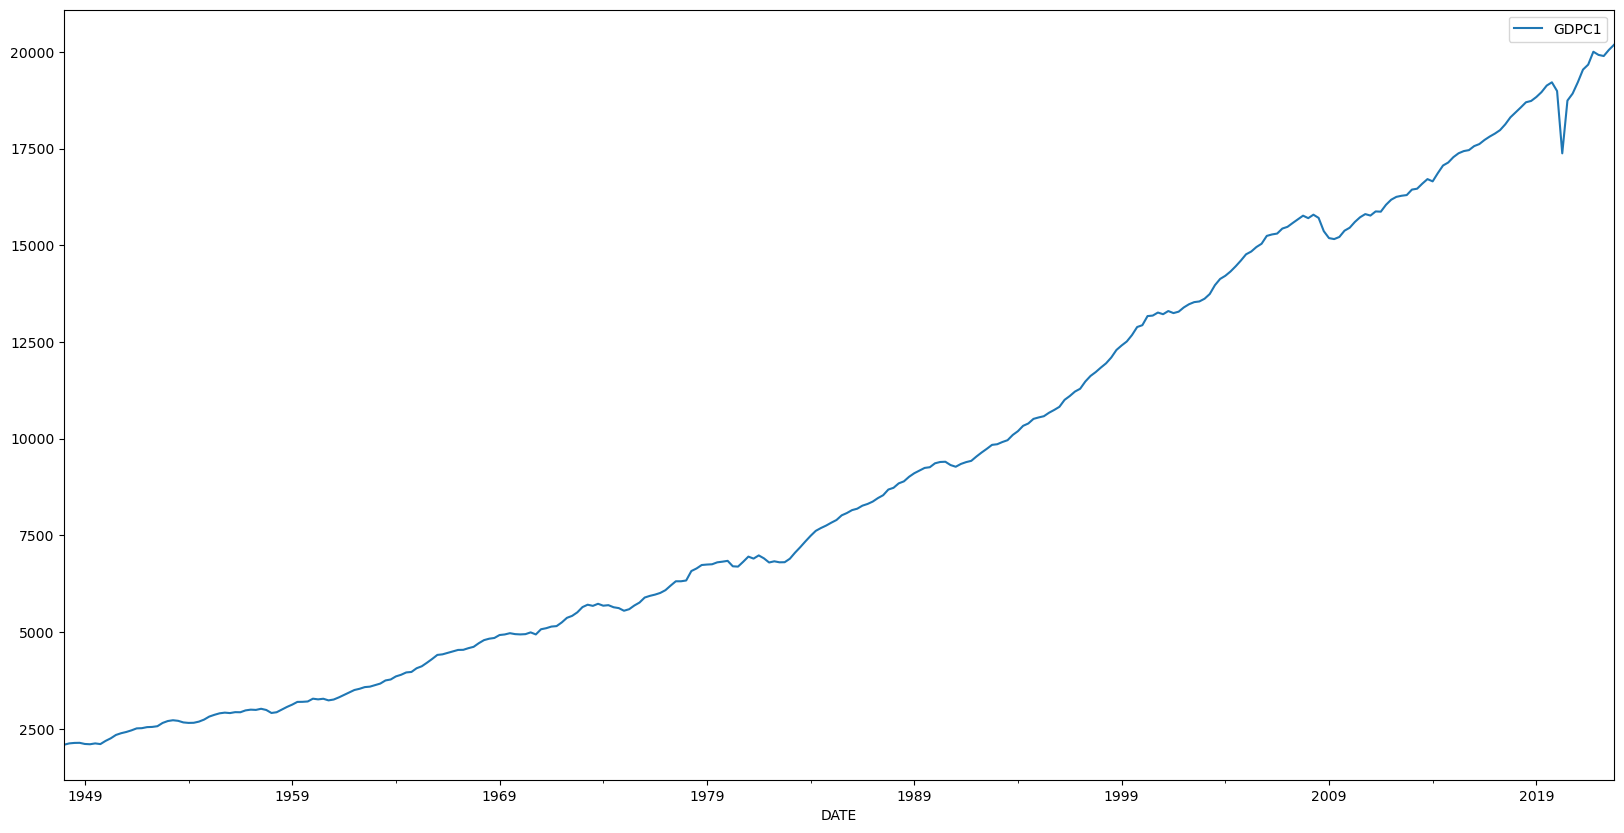

In [5]:
df.plot.line(figsize = (20,10))

In [6]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            # .first() or .last() .median() ...
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()            
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [7]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "M")


In [8]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [9]:
data.iloc[-10:]

Base: Total  Base: Currency in Circulation
DATE                                                  
2019-12-31   3415126.50                     1794259.75
2020-01-31   3440867.80                     1798984.40
2020-02-29   3446282.50                     1795983.75
2020-03-31   3707586.50                     1826075.75
2020-04-30   4783890.20                     1887379.60
2020-05-31   5139460.00                     1929728.50
2020-06-30   5059368.25                     1955370.00
2020-07-31   4725875.20                     1978267.80
2020-08-31   4790990.00                     2004523.50
2020-09-30   4876690.00                     2026246.20

<AxesSubplot:xlabel='DATE'>

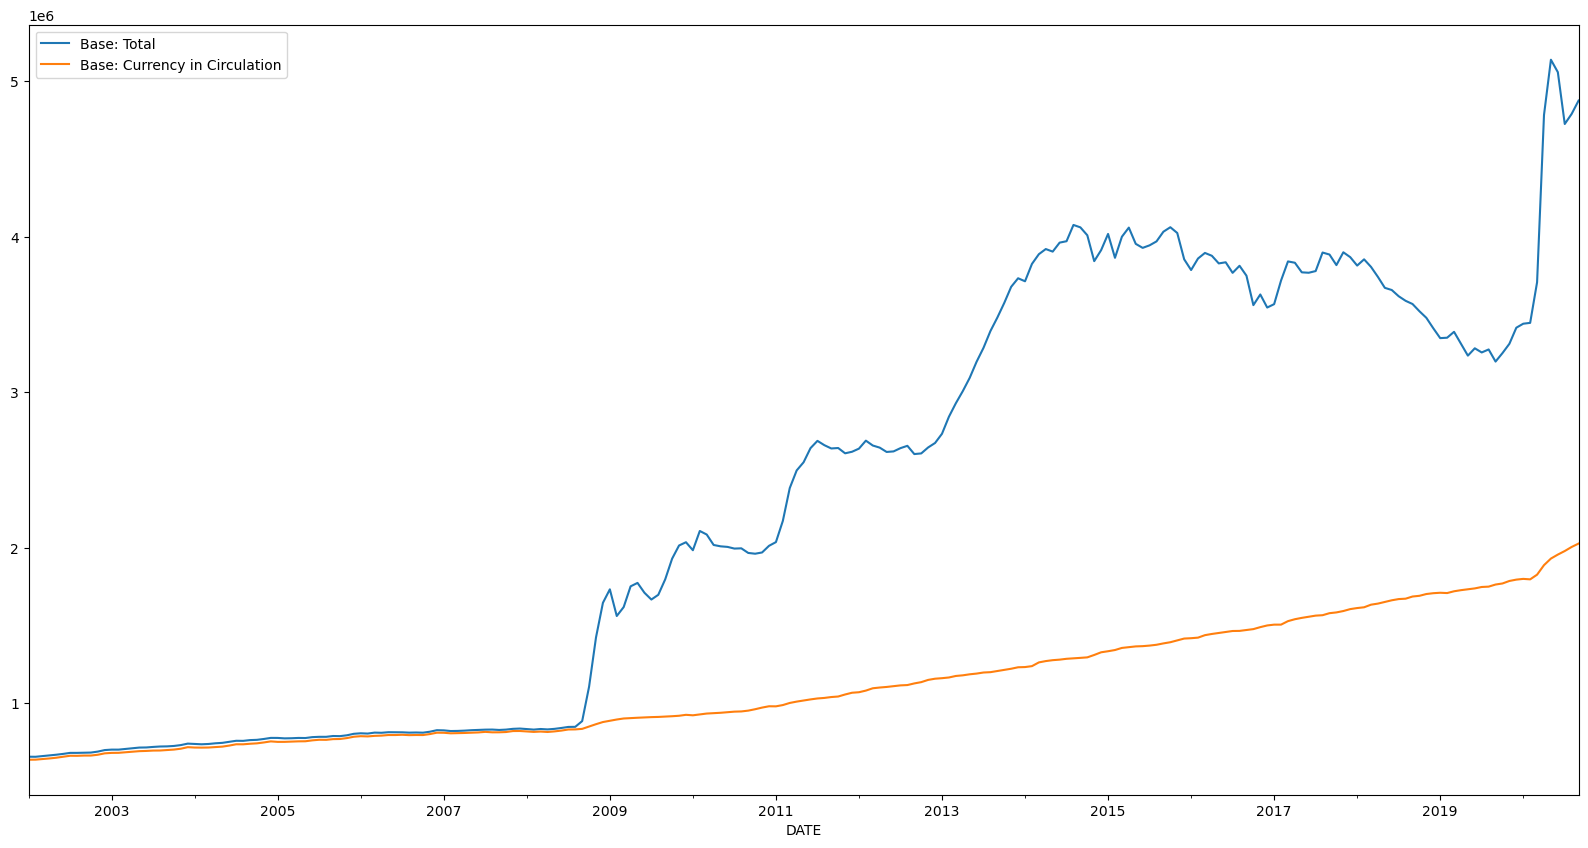

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

Text(0.5, 1.0, 'Currency in Circulation')

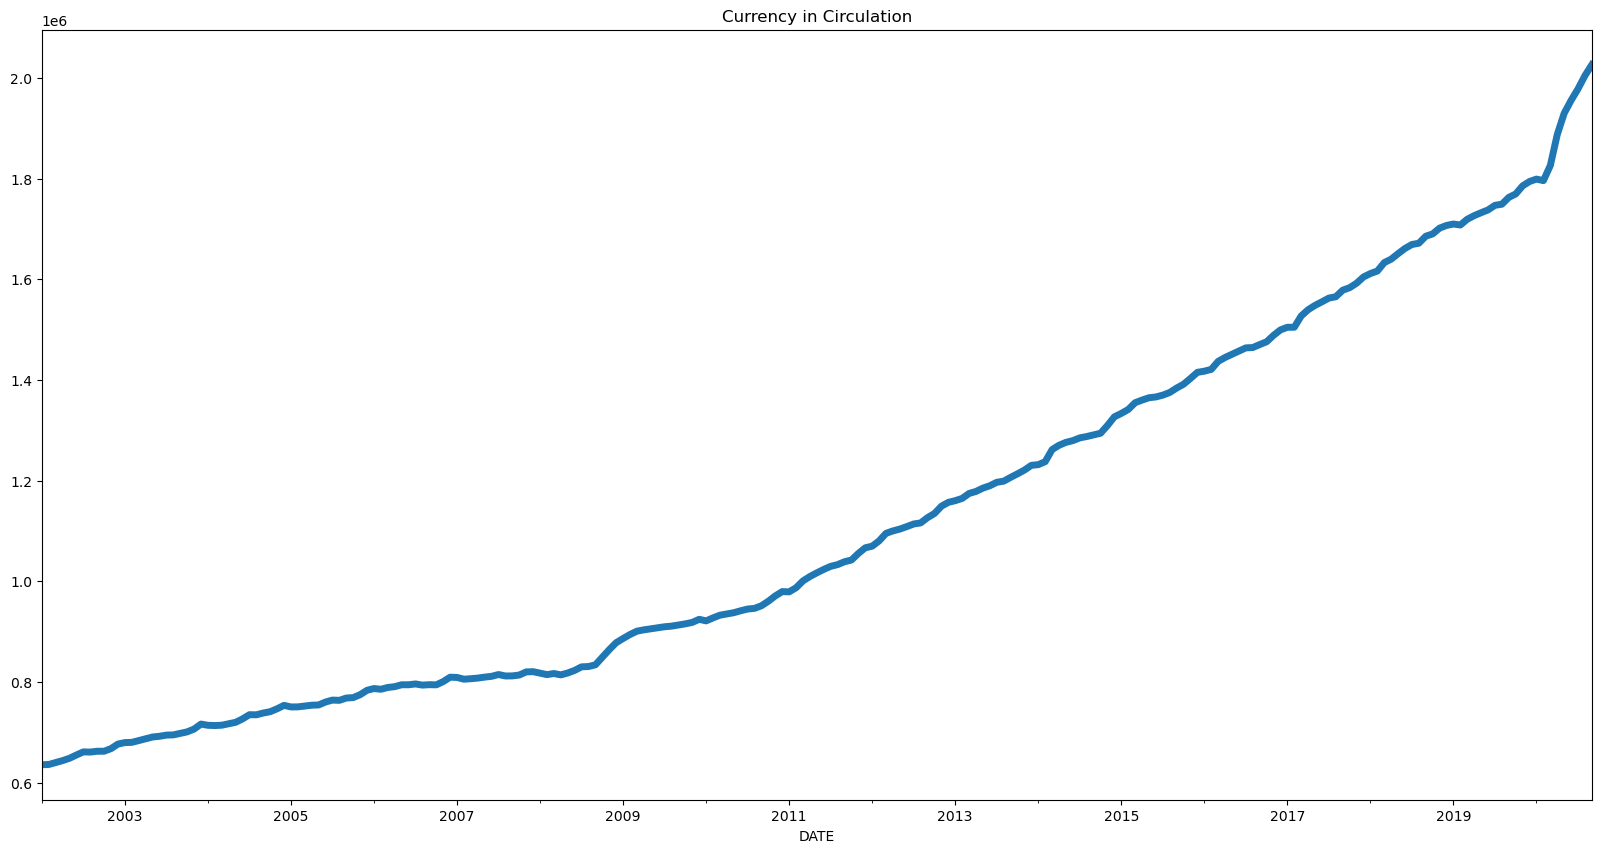

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(linewidth = 5, ax = ax)
ax.set_title("Currency in Circulation")


In [12]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

data = gather_data(data_codes = data_codes, start = start, 
                   end = end, 
                   freq = "M")

#data = pd.read_csv("MonetaryData.csv", index_col = [0])

In [13]:
# save as csv
data.to_csv("MonetaryData.csv")

# Merge two datasets, interest on reserves at Fed, with one overlapping date

<AxesSubplot:xlabel='DATE'>

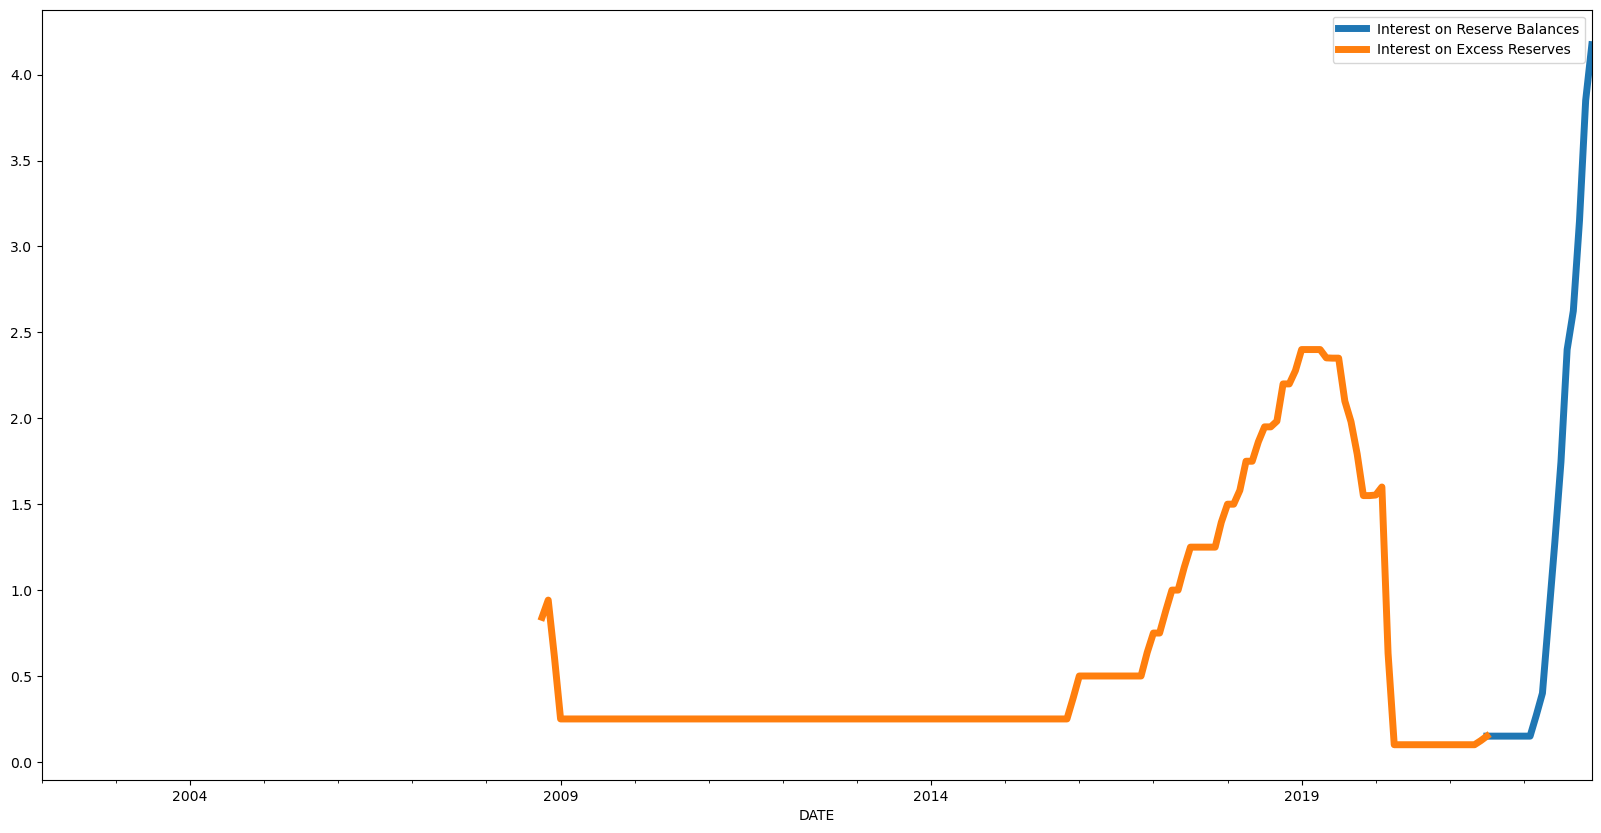

In [14]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.line(ax = ax, linewidth = 5)

In [15]:
match = plot_data[plot_data[
    "Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match

Interest on Reserve Balances  Interest on Excess Reserves
DATE                                                                 
2021-07-31                          0.15                         0.15

In [16]:
match_date = match.index
match_val = match.sum(axis = 1) / 2
match_date, match_val

(DatetimeIndex(['2021-07-31'], dtype='datetime64[ns]', name='DATE', freq='M'),
 DATE
 2021-07-31    0.15
 Freq: M, dtype: float64)

<AxesSubplot:xlabel='DATE'>

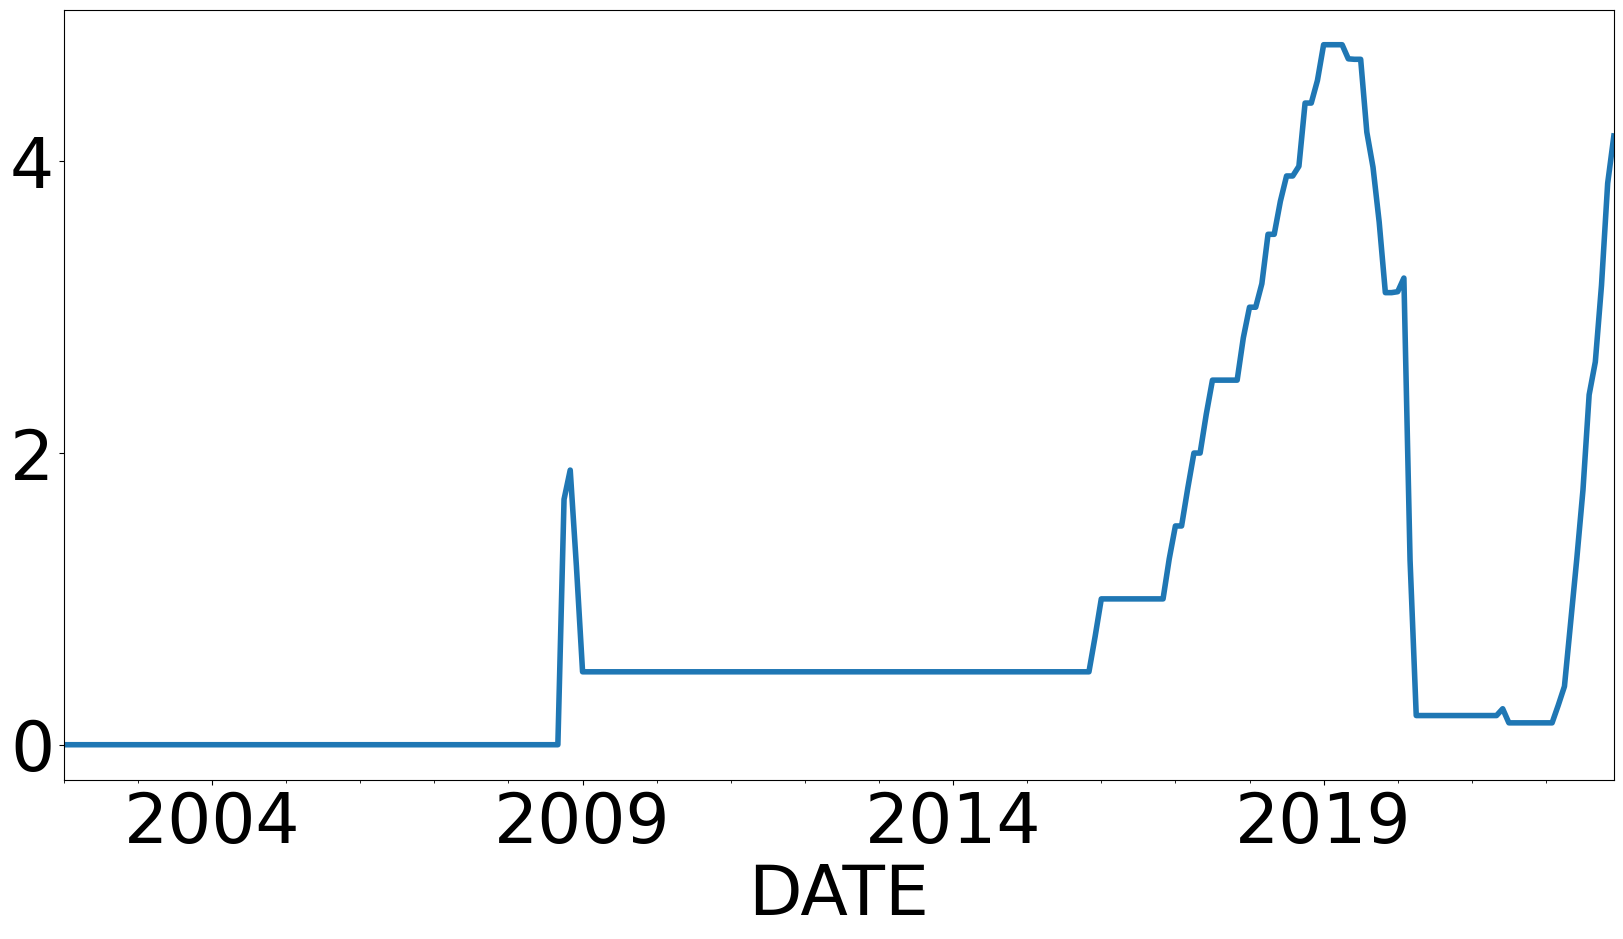

In [30]:
fig, ax = plt.subplots(figsize = (20,10))
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]

# create proper plot_data values by filling zeros
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis = 1)

#change overlapping day to correct value
plot_data.loc[match_date] = match_val

#plot new graph
plot_data.plot.line(linewidth = 4, ax = ax)
#data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(
#    data["Interest on Reserves"])



In [18]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-08-31    2.400000
2022-09-30    2.625000
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
Freq: M, Length: 252, dtype: float64

<AxesSubplot:xlabel='DATE'>

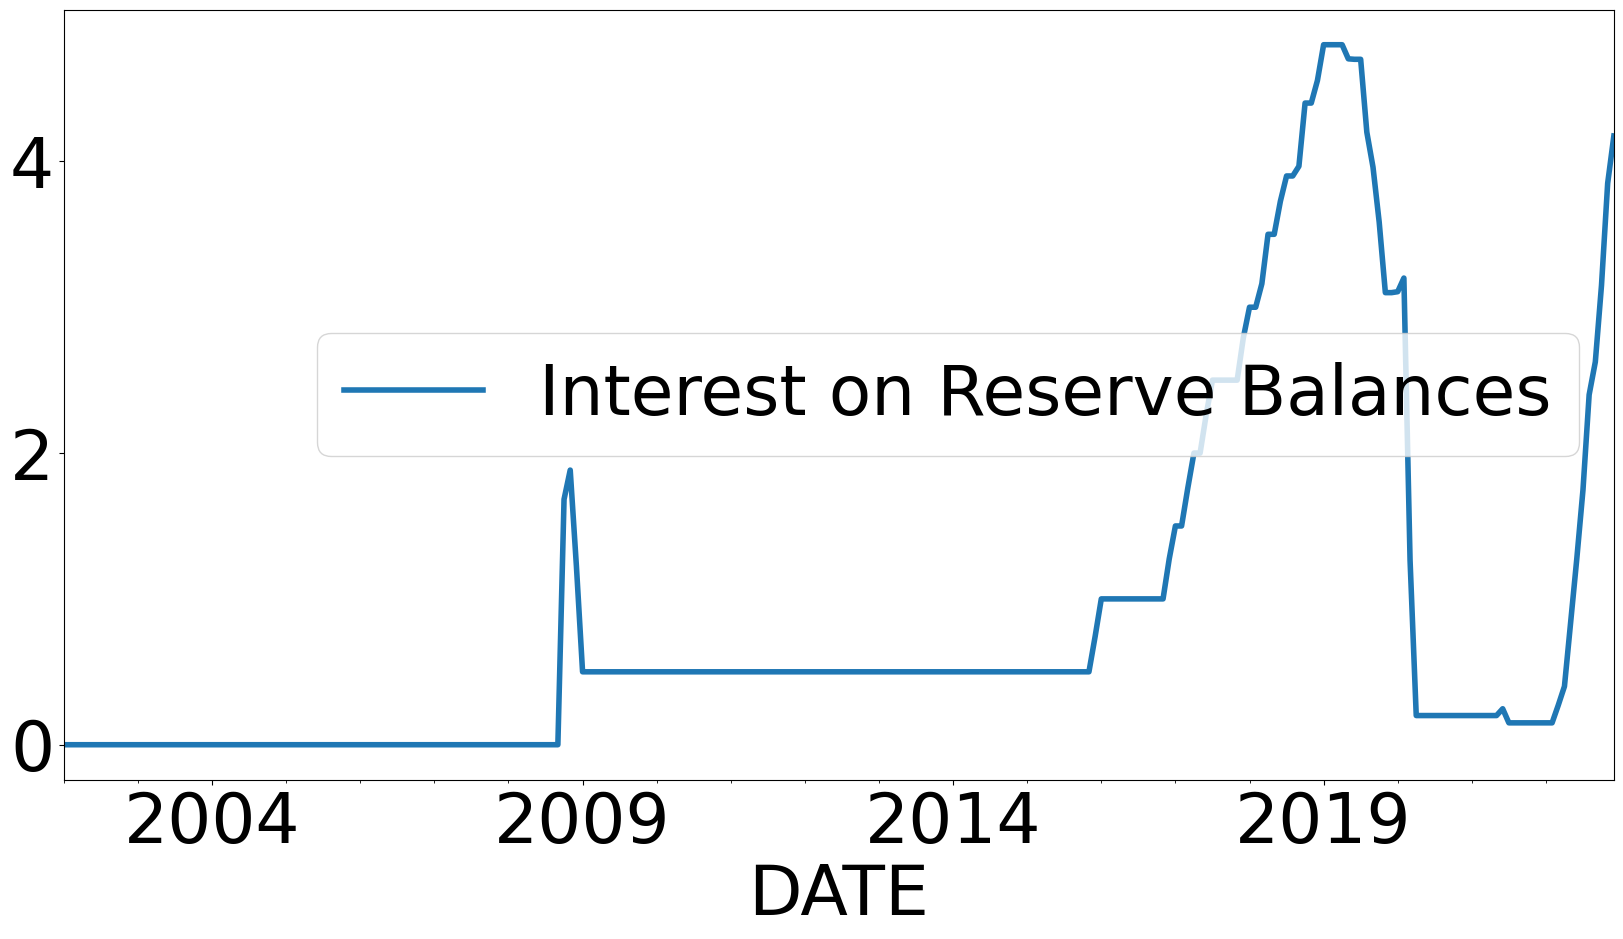

In [32]:
data["Interest on Reserve Balances"] = plot_data
fig, ax = plt.subplots(figsize = (20,10))
data[["Interest on Reserve Balances"]].plot(linewidth = 4, ax = ax)

## Build function to Plot lines of data in dataframe

In [20]:
# python kwargs allow you to pass on values with keywords in matplotlib

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_6856\546213954.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_6856\546213954.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in y_vals])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%'),
 Text(0, 6.0, '6.0%')]

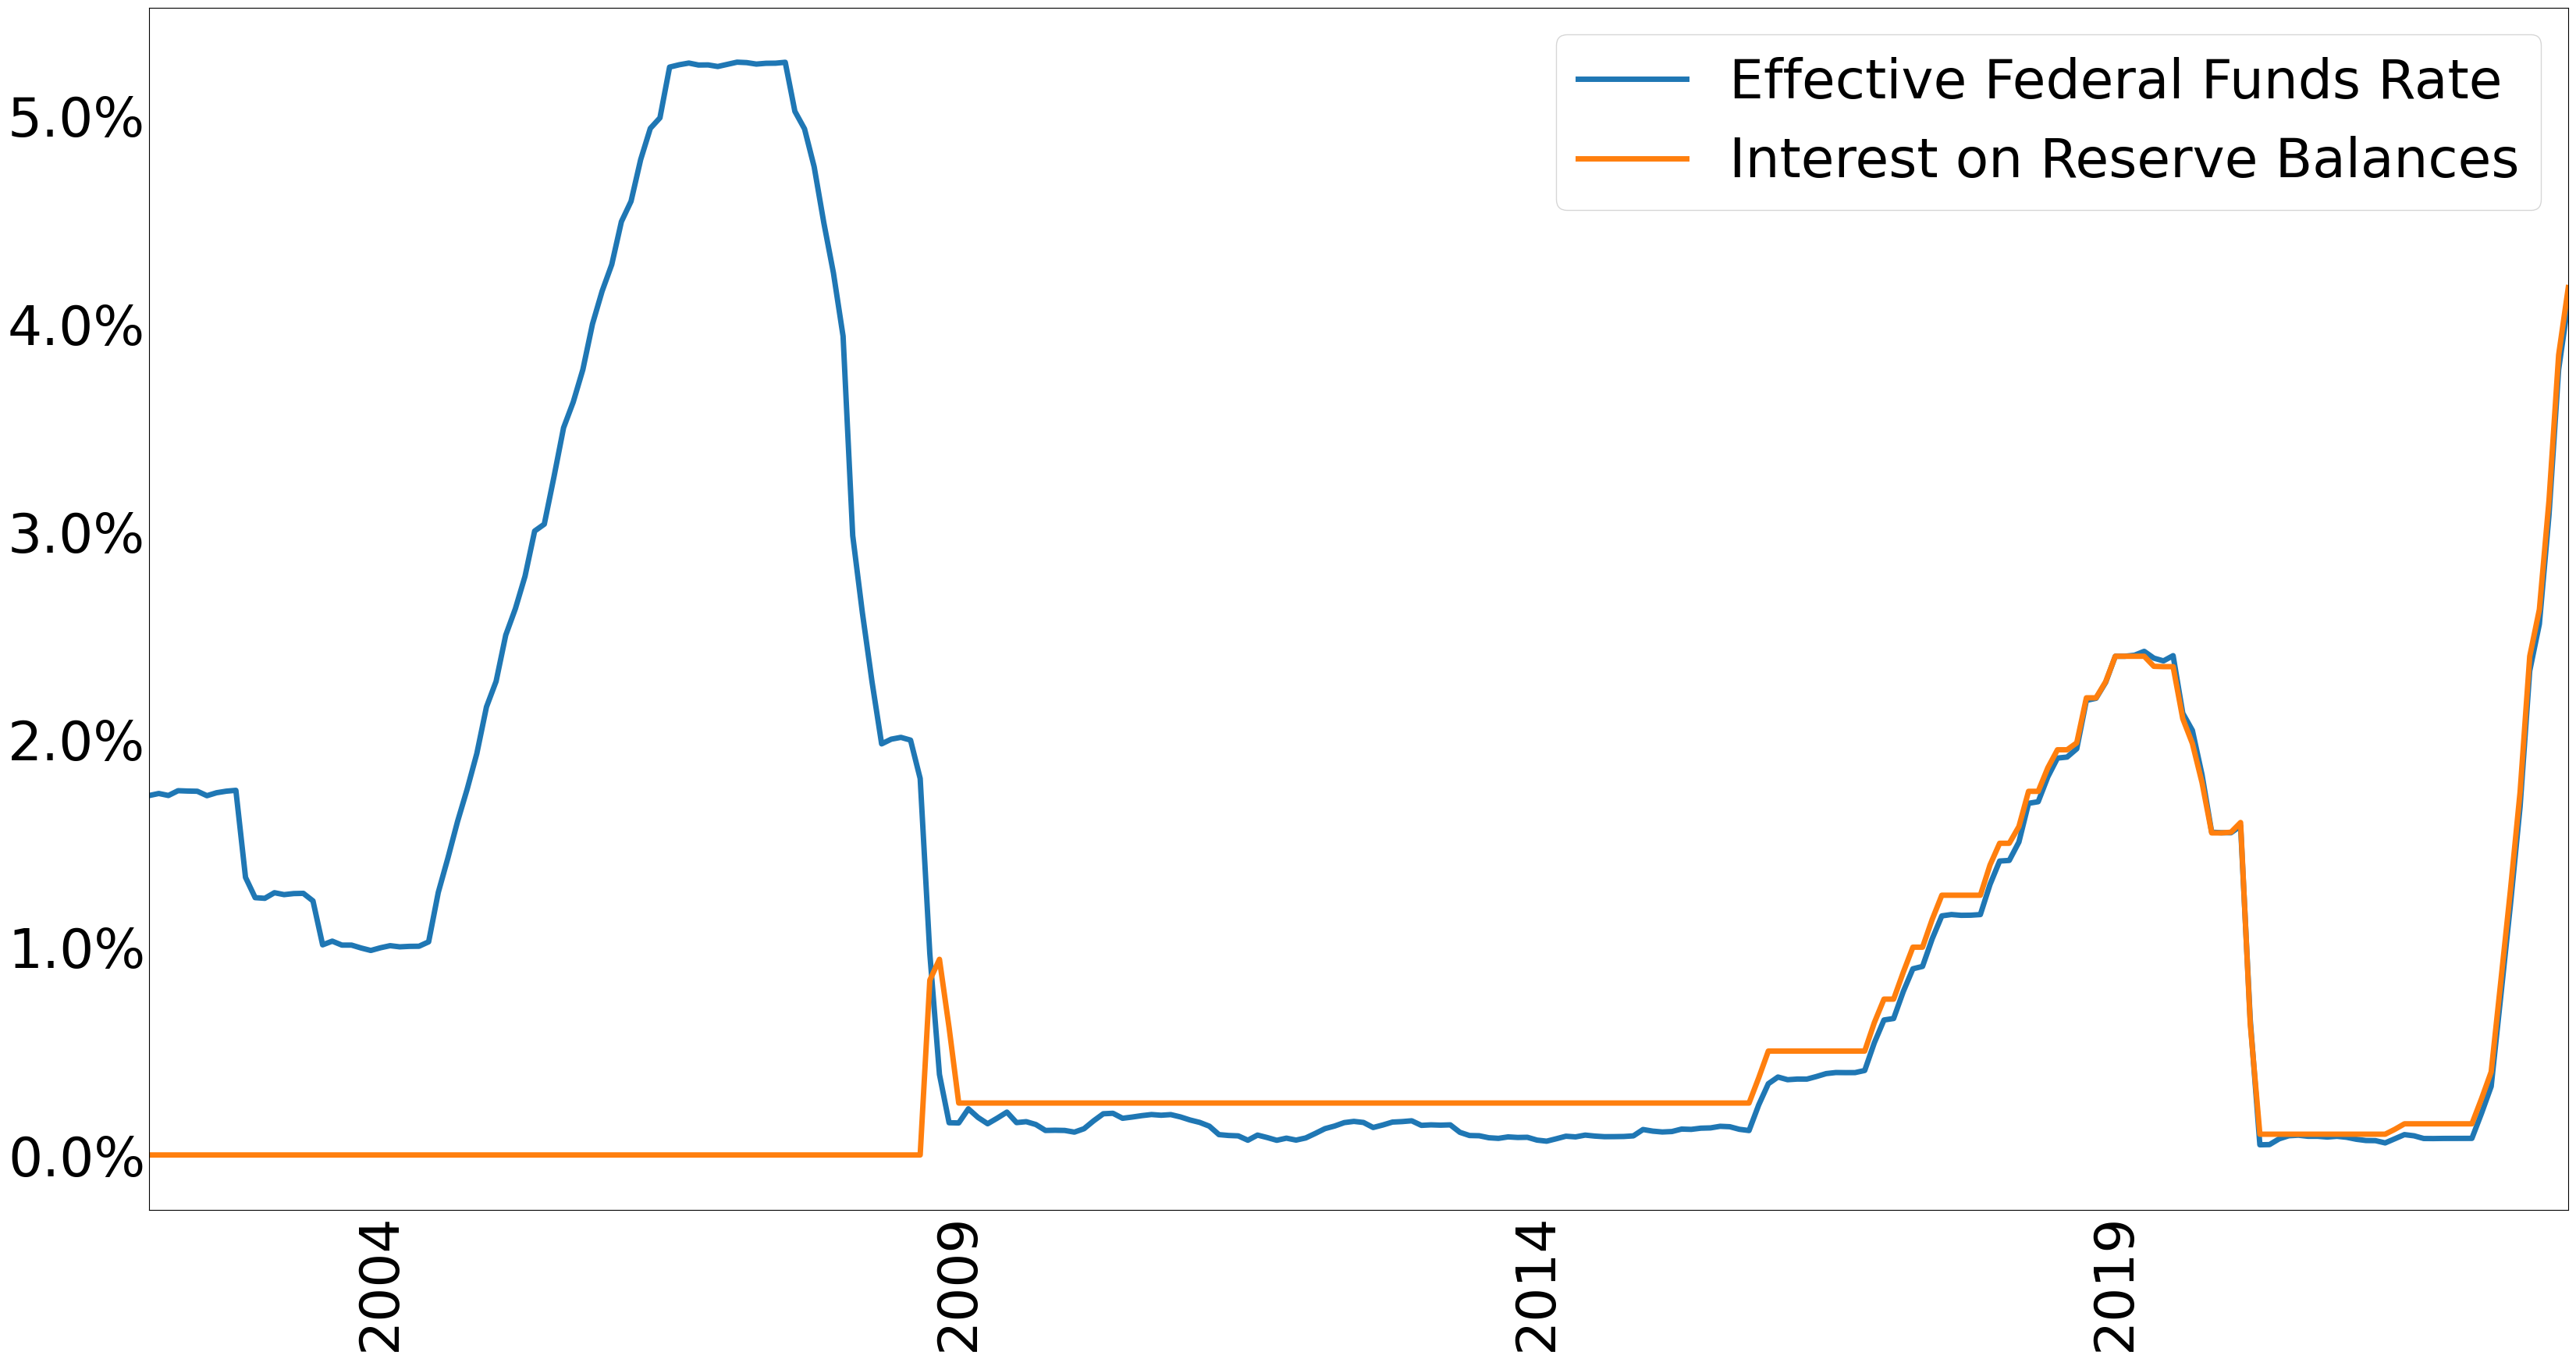

In [21]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
              global_fontsize = 50):
    # update global fontsizes
    
    
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE"
    ax.set_xlabel("")
    # rotate x axis labels
    ax.tick_params(axis = "x", rotation = 90)
    # remove ticklines on x and y axis
    ax.tick_params(length=0, which="both")
    # round axis tick values
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    # save figure as file
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    # remove characters from filename
    for char in remove_chars:
        filename = filename.replace(char, "")
    if save_fig:
        folder = "Monetary Plots"
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + "/" + filename[:50] + " line.png",
                   bbox_inches = "tight")
        
    
    return fig, ax

plot_data = data[["Effective Federal Funds Rate",
                 "Interest on Reserve Balances"]]


# possible to make changes on the fly, even though we are using a 
# previously defined function
fig, ax = plot_lines(plot_data, save_fig = True)
y_vals = ax.get_yticks()
ax.set_yticklabels([str(y) + "%" for y in y_vals])

## Monetary Base

In [22]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                  "Balance Sheet: Other Deposits ($ Mil)",
                  "Base: Currency in Circulation ($ Mil)"]

for key in bil_to_mil_list:
    data[key] = data[key].mul(10 **3)

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_6856\546213954.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:>)

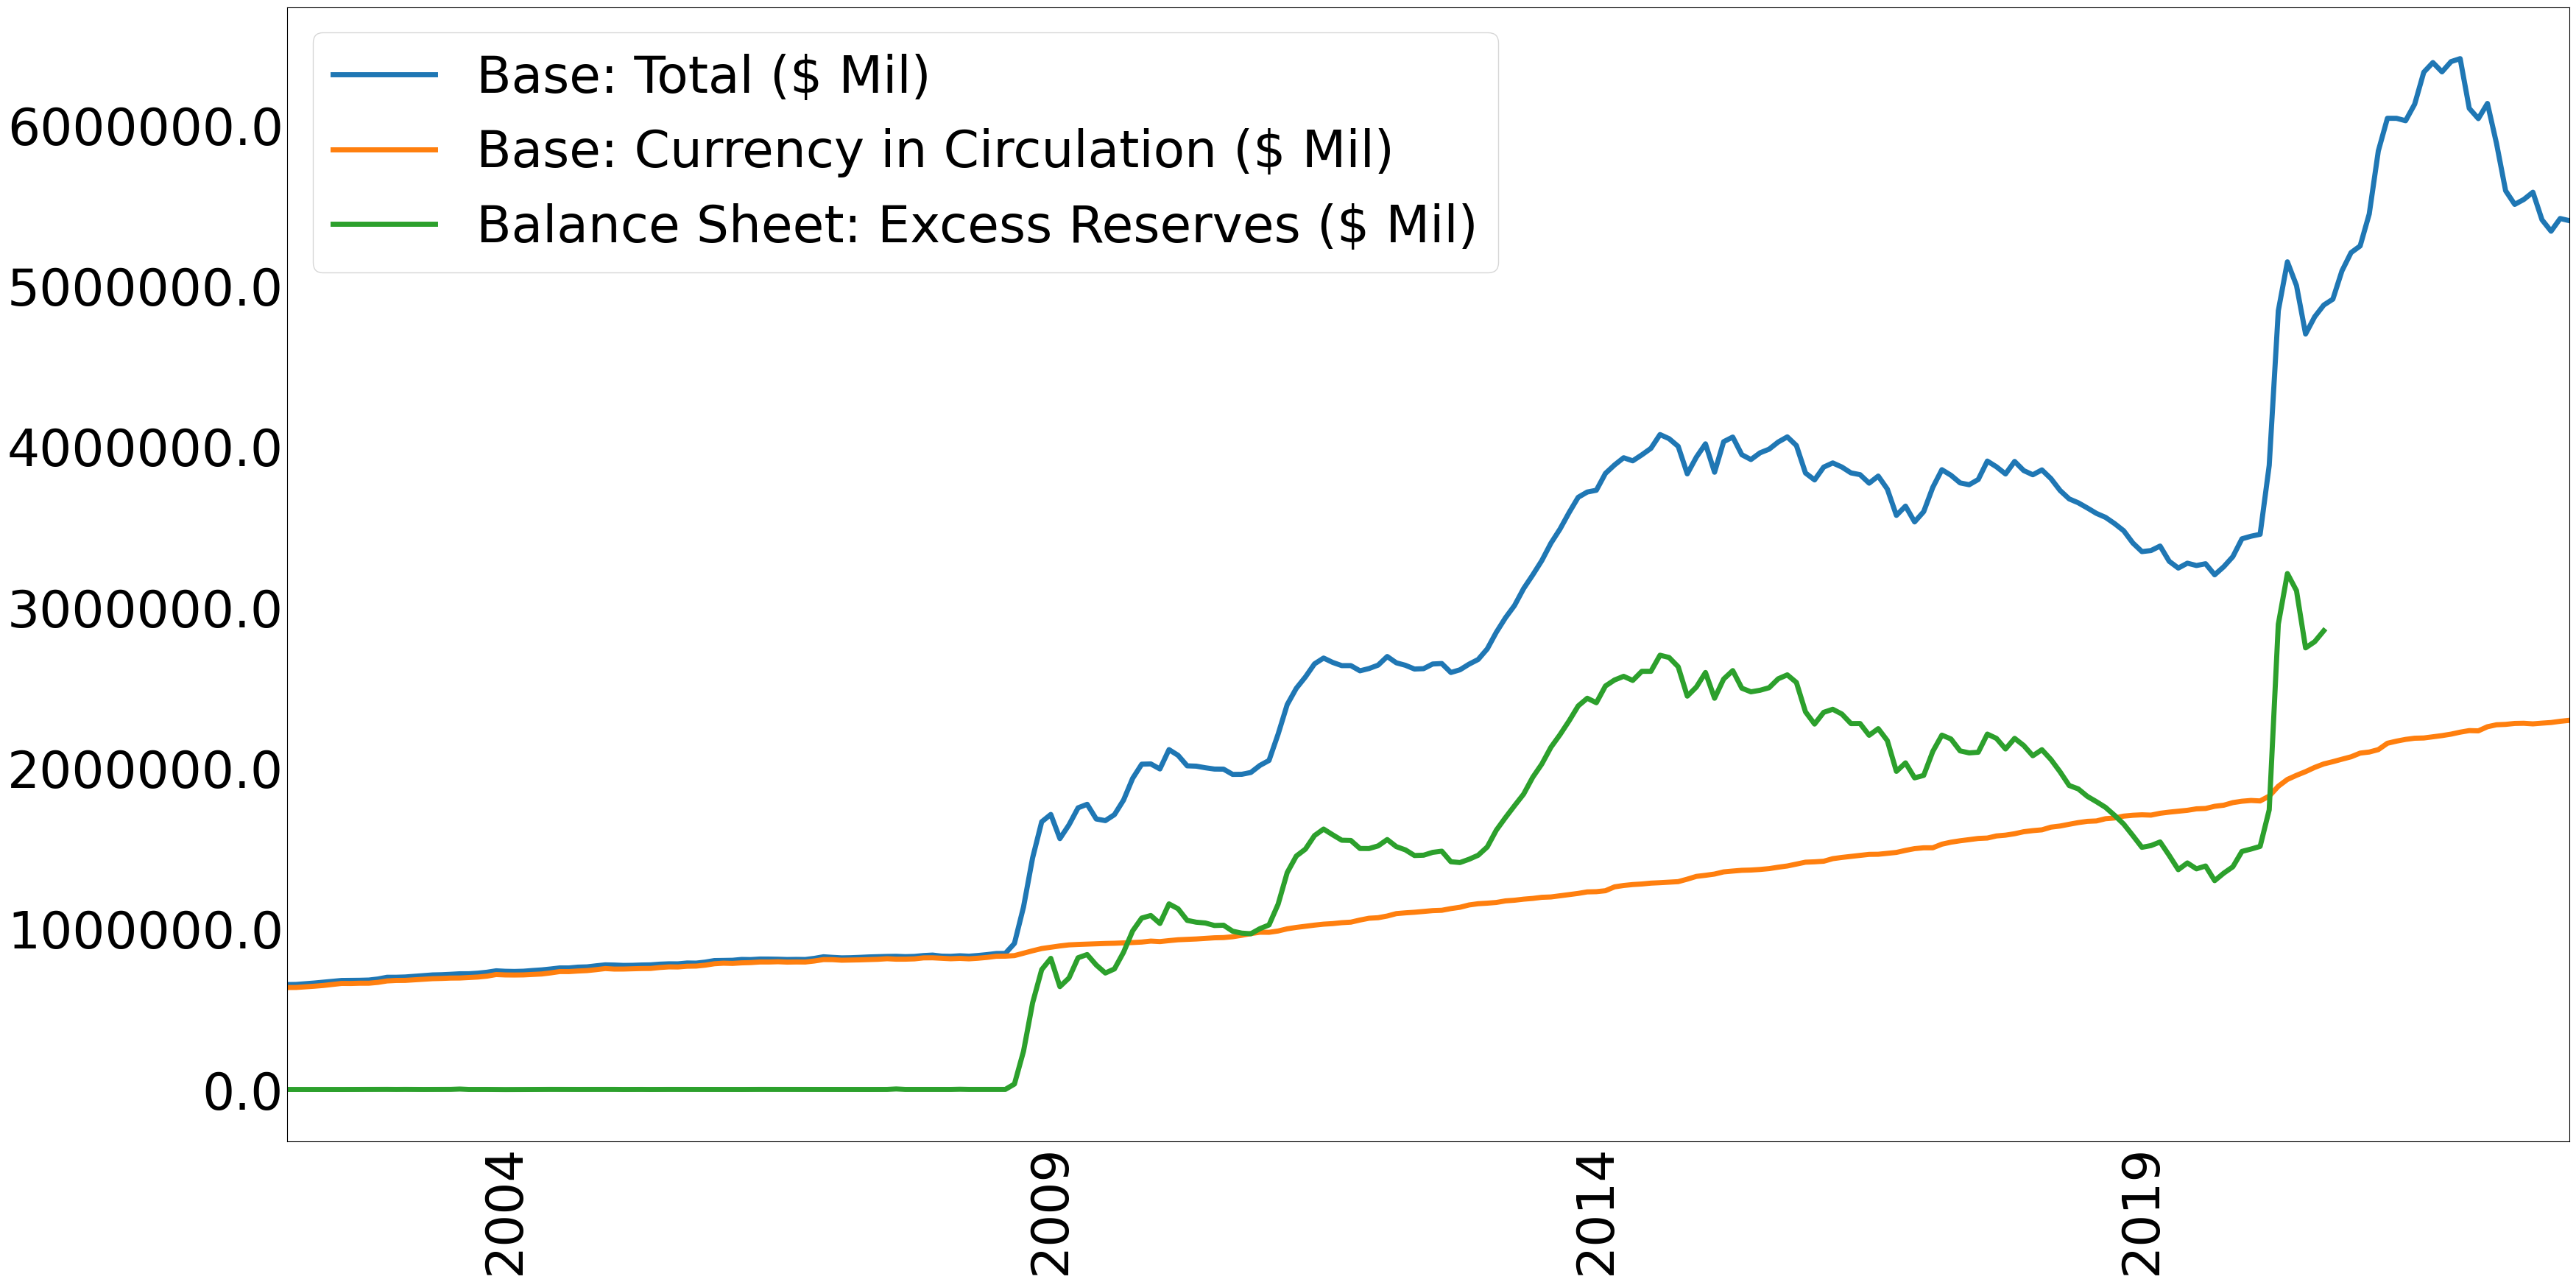

In [23]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_lines(df = plot_data, linewidth = 5, figsize = (40, 20), pp = None)

In [24]:
plot_data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-01-31             653800.0                              635429.00   
2002-02-28             654600.0                              635884.00   
2002-03-31             659000.0                              639697.50   
2002-04-30             663400.0                              643579.50   
2002-05-31             668600.0                              648293.20   
...                         ...                                    ...   
2022-08-31            5582300.0                             2275415.60   
2022-09-30            5410900.0                             2279946.25   
2022-10-31            5339700.0                             2283799.00   
2022-11-30            5418700.0                             2291416.00   
2022-12-31            5405400.0                             2297343.50   

            Balance Sheet: Excess Reserves ($ Mil)  
DATE                                                
2002-01-31                                 1446.20  
2002-02-28                                 1377.25  
2002-03-31                                 1370.25  
2002-04-30                                 1263.50  
2002-05-31                                 1256.20  
...                                            ...  
2022-08-31                                     NaN  
2022-09-30                                     NaN  
2022-10-31                                     NaN  
2022-11-30                                     NaN  
2022-12-31                                     NaN  

[252 rows x 3 columns]

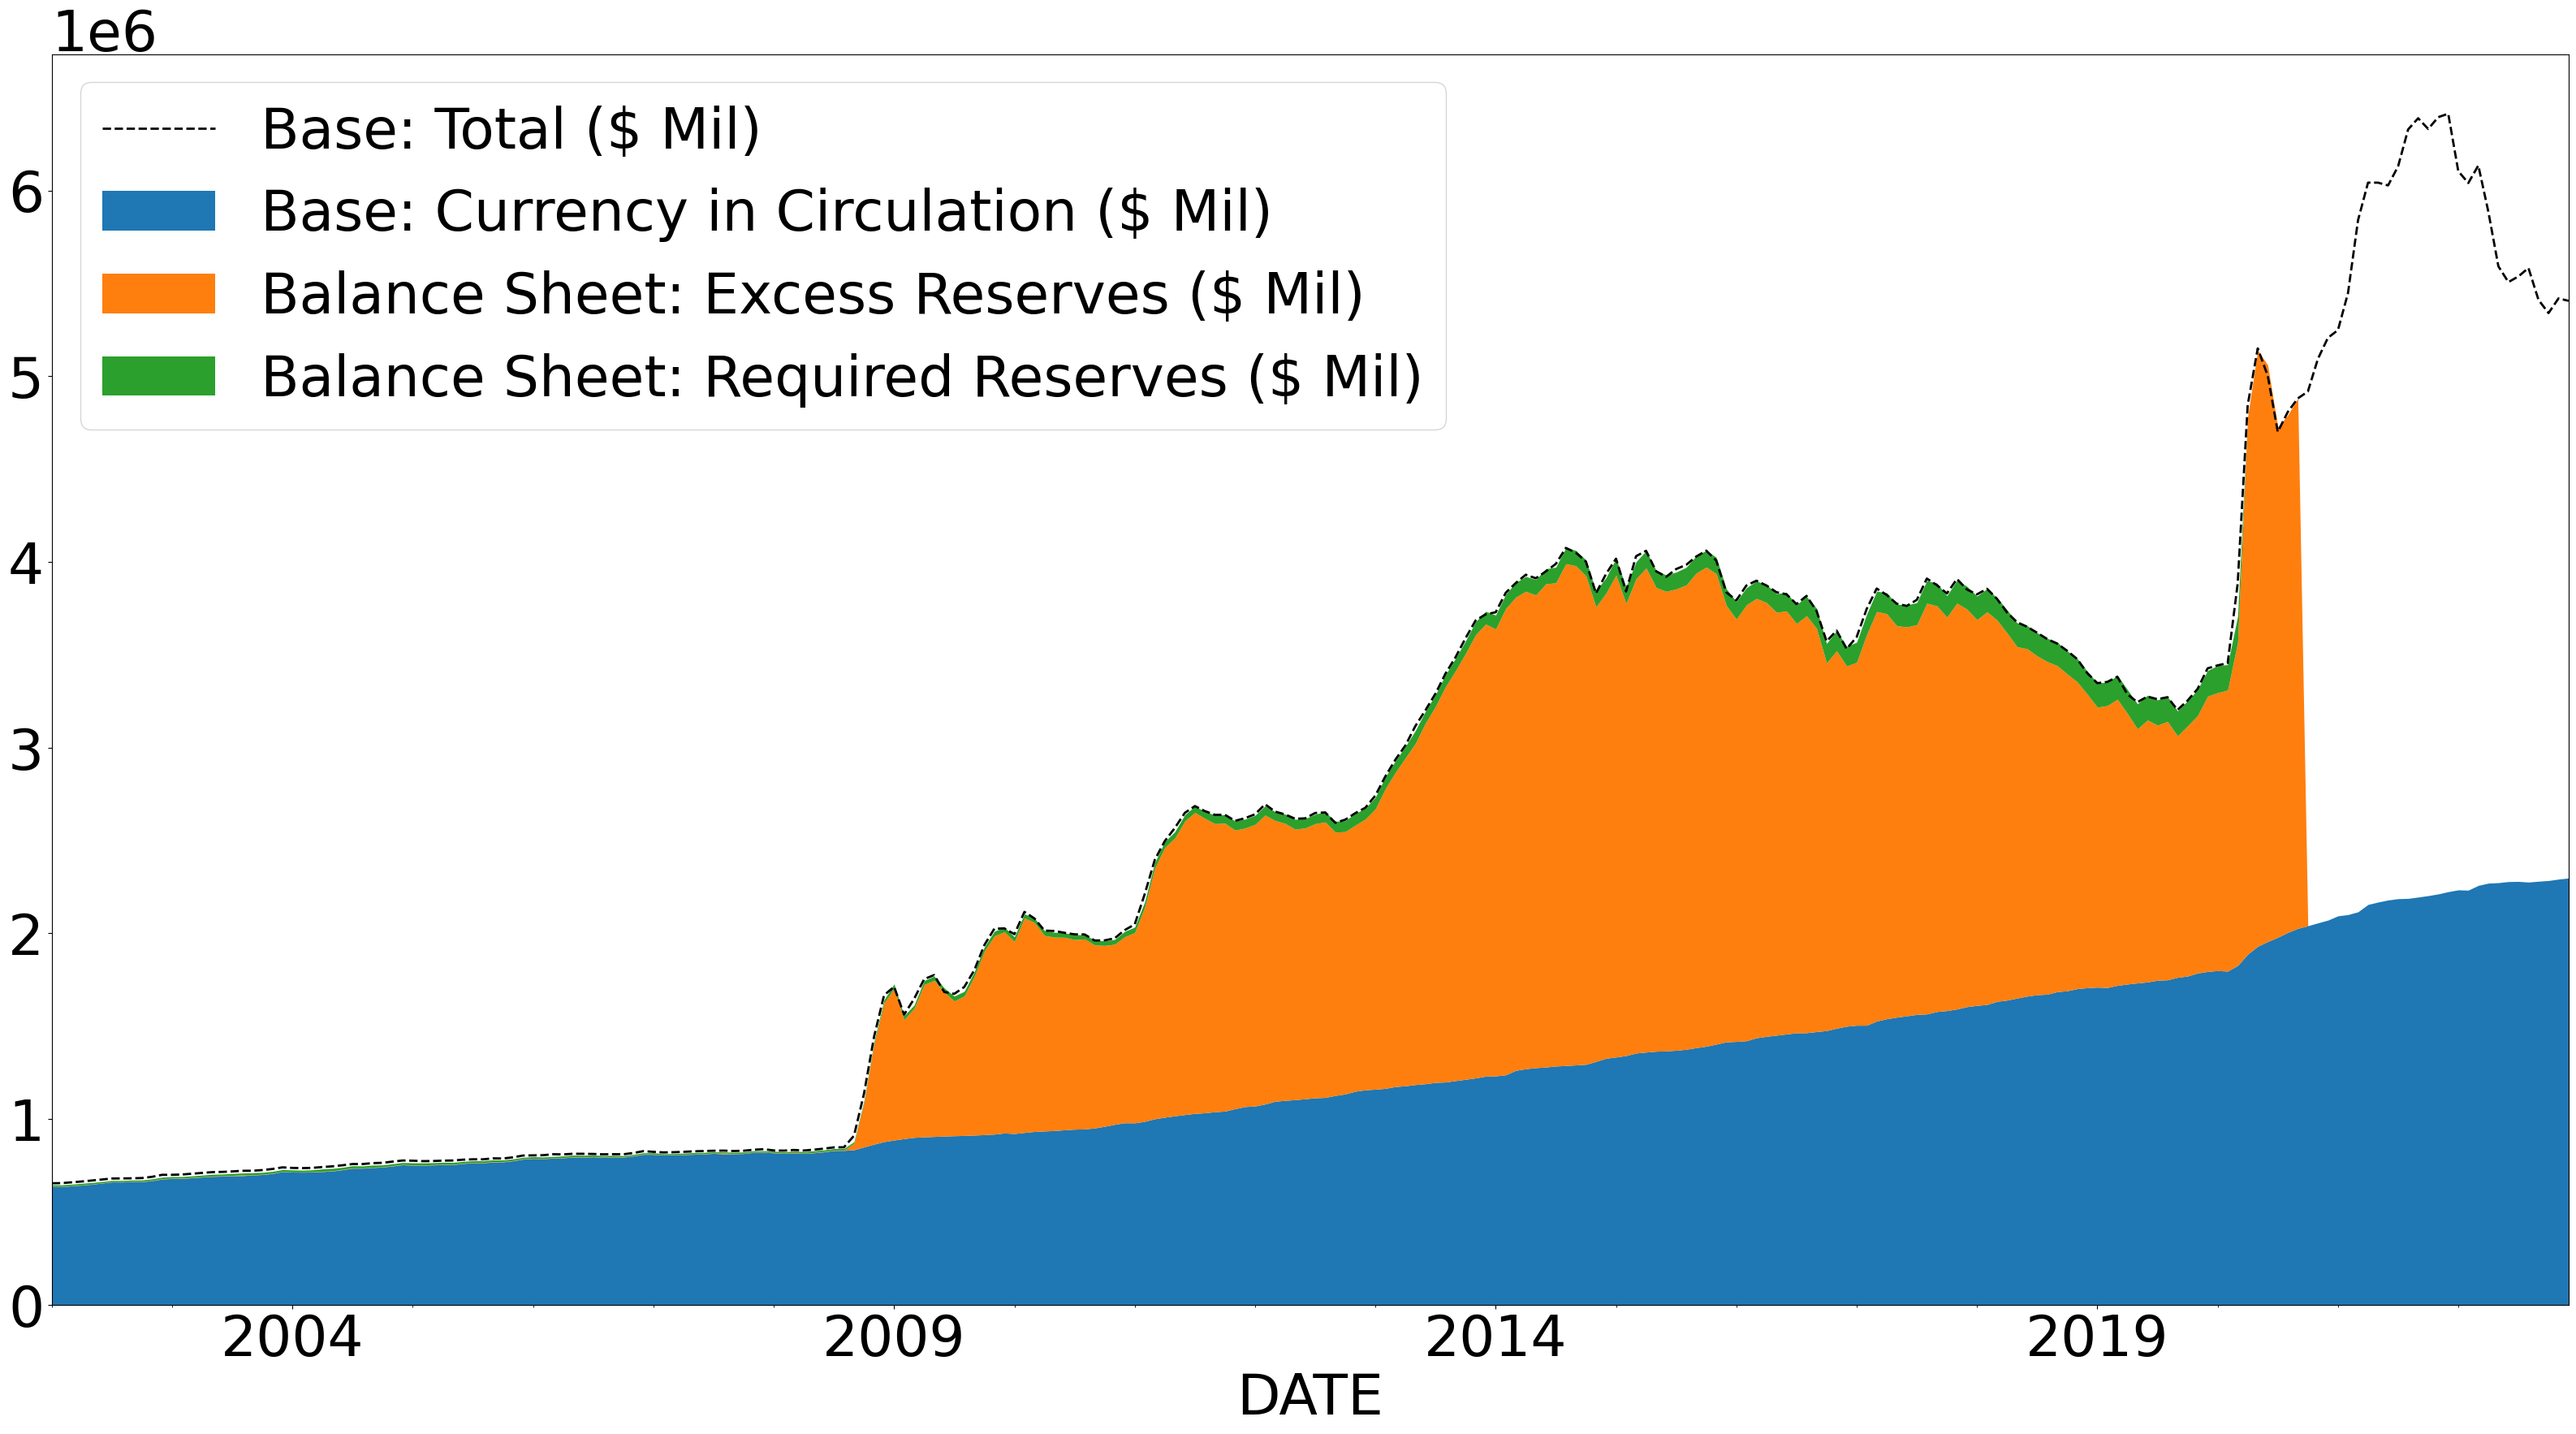

In [44]:
def plot_stacked(df,
               stack_vars,
               linewidth = 2,
               figsize = (40,20),
                 total_var = False,
                global_fontsize = 50,
                 ncol = 1
               ):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize) 
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth,
            ax = ax,
            c = "k",
            label = total_var,
            ls = "--")
    ax.legend(loc = 2, ncol = ncol)
    plt.xticks(rotation = 90)
             #bbox_to_anchor = (0,1))
   
    
    area_df = df[stack_vars]
    area_df.plot.area(stacked = True,
                     linewidth = 0,
                     ax = ax)
    
    
    return fig, ax


stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data, 
                       stack_vars = stack_vars,
                       total_var = total_var)

In [40]:
#money_vars = money_vars + ["Balance Sheet: Required Reserves ($ Mil)"]
money_vars 

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)']

Base: Total ($ Mil) ['Base: Currency in Circulation ($ Mil)', 'Balance Sheet: Excess Reserves ($ Mil)', 'Balance Sheet: Required Reserves ($ Mil)']


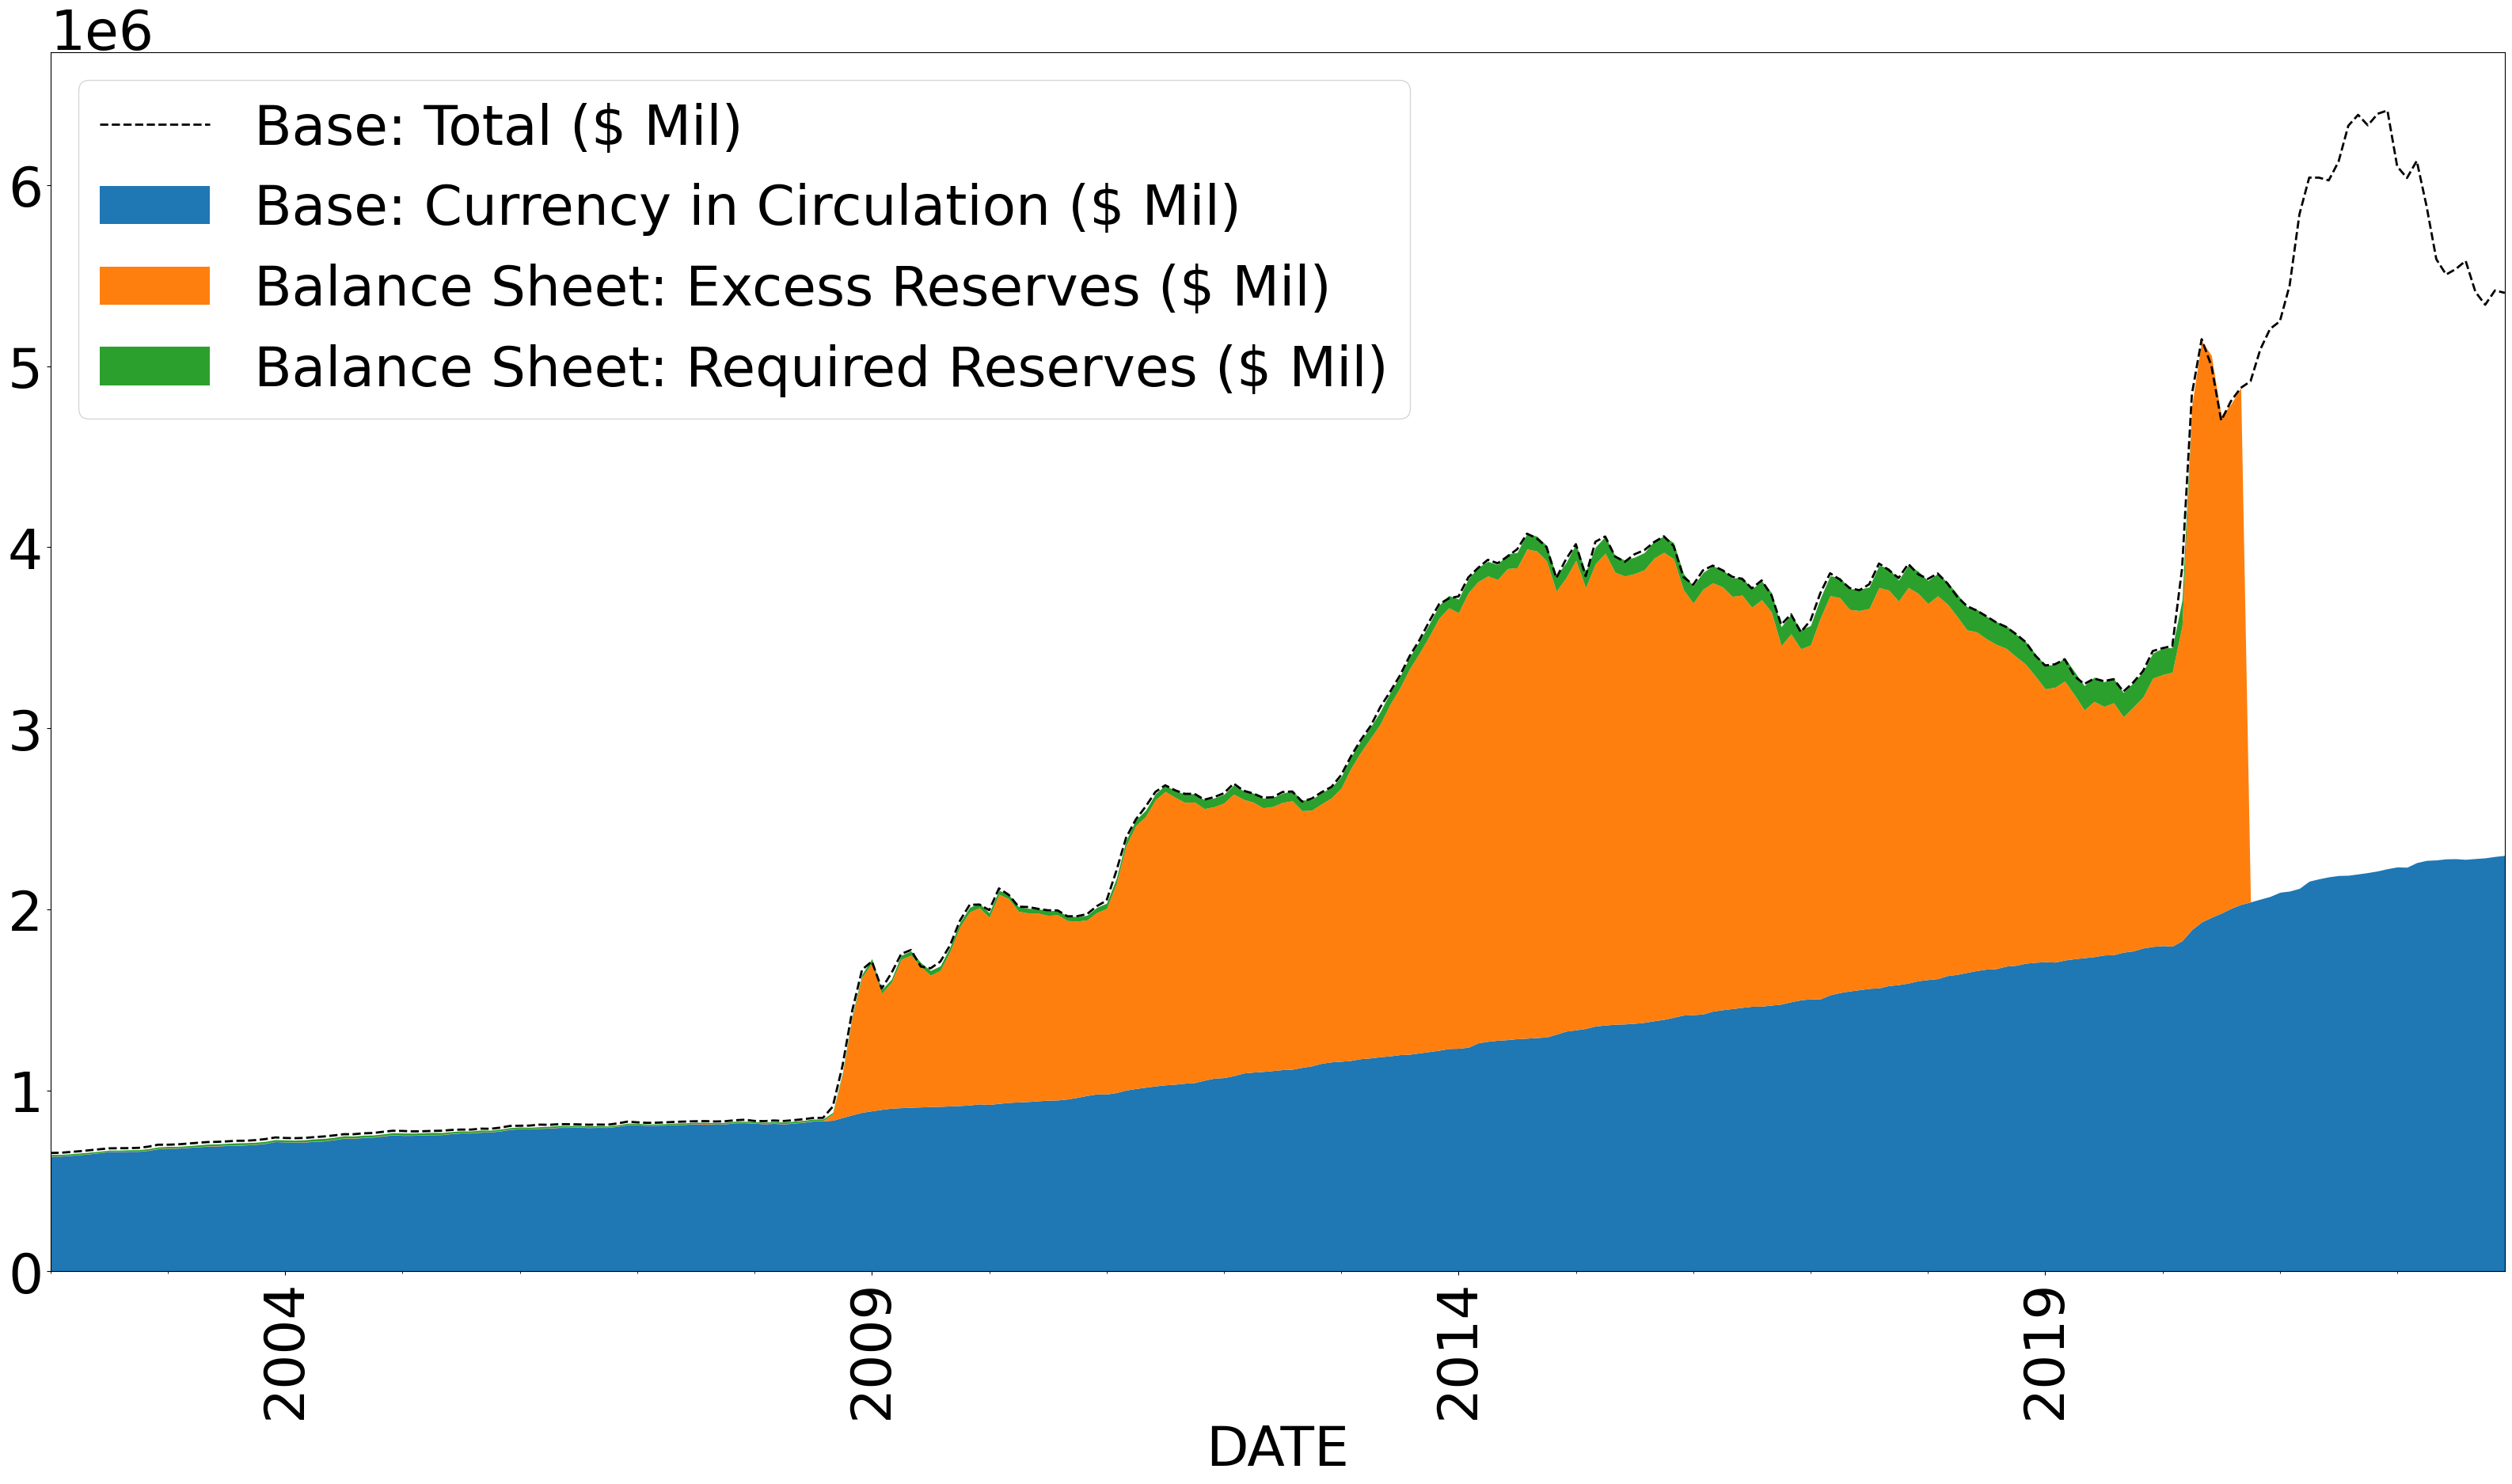

In [48]:
stack_vars = money_vars[1:]

fig, ax = plot_stacked(df = data, 
                       stack_vars = stack_vars, total_var = total_var)
plt.xticks(rotation = 90)
print(total_var, stack_vars)

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

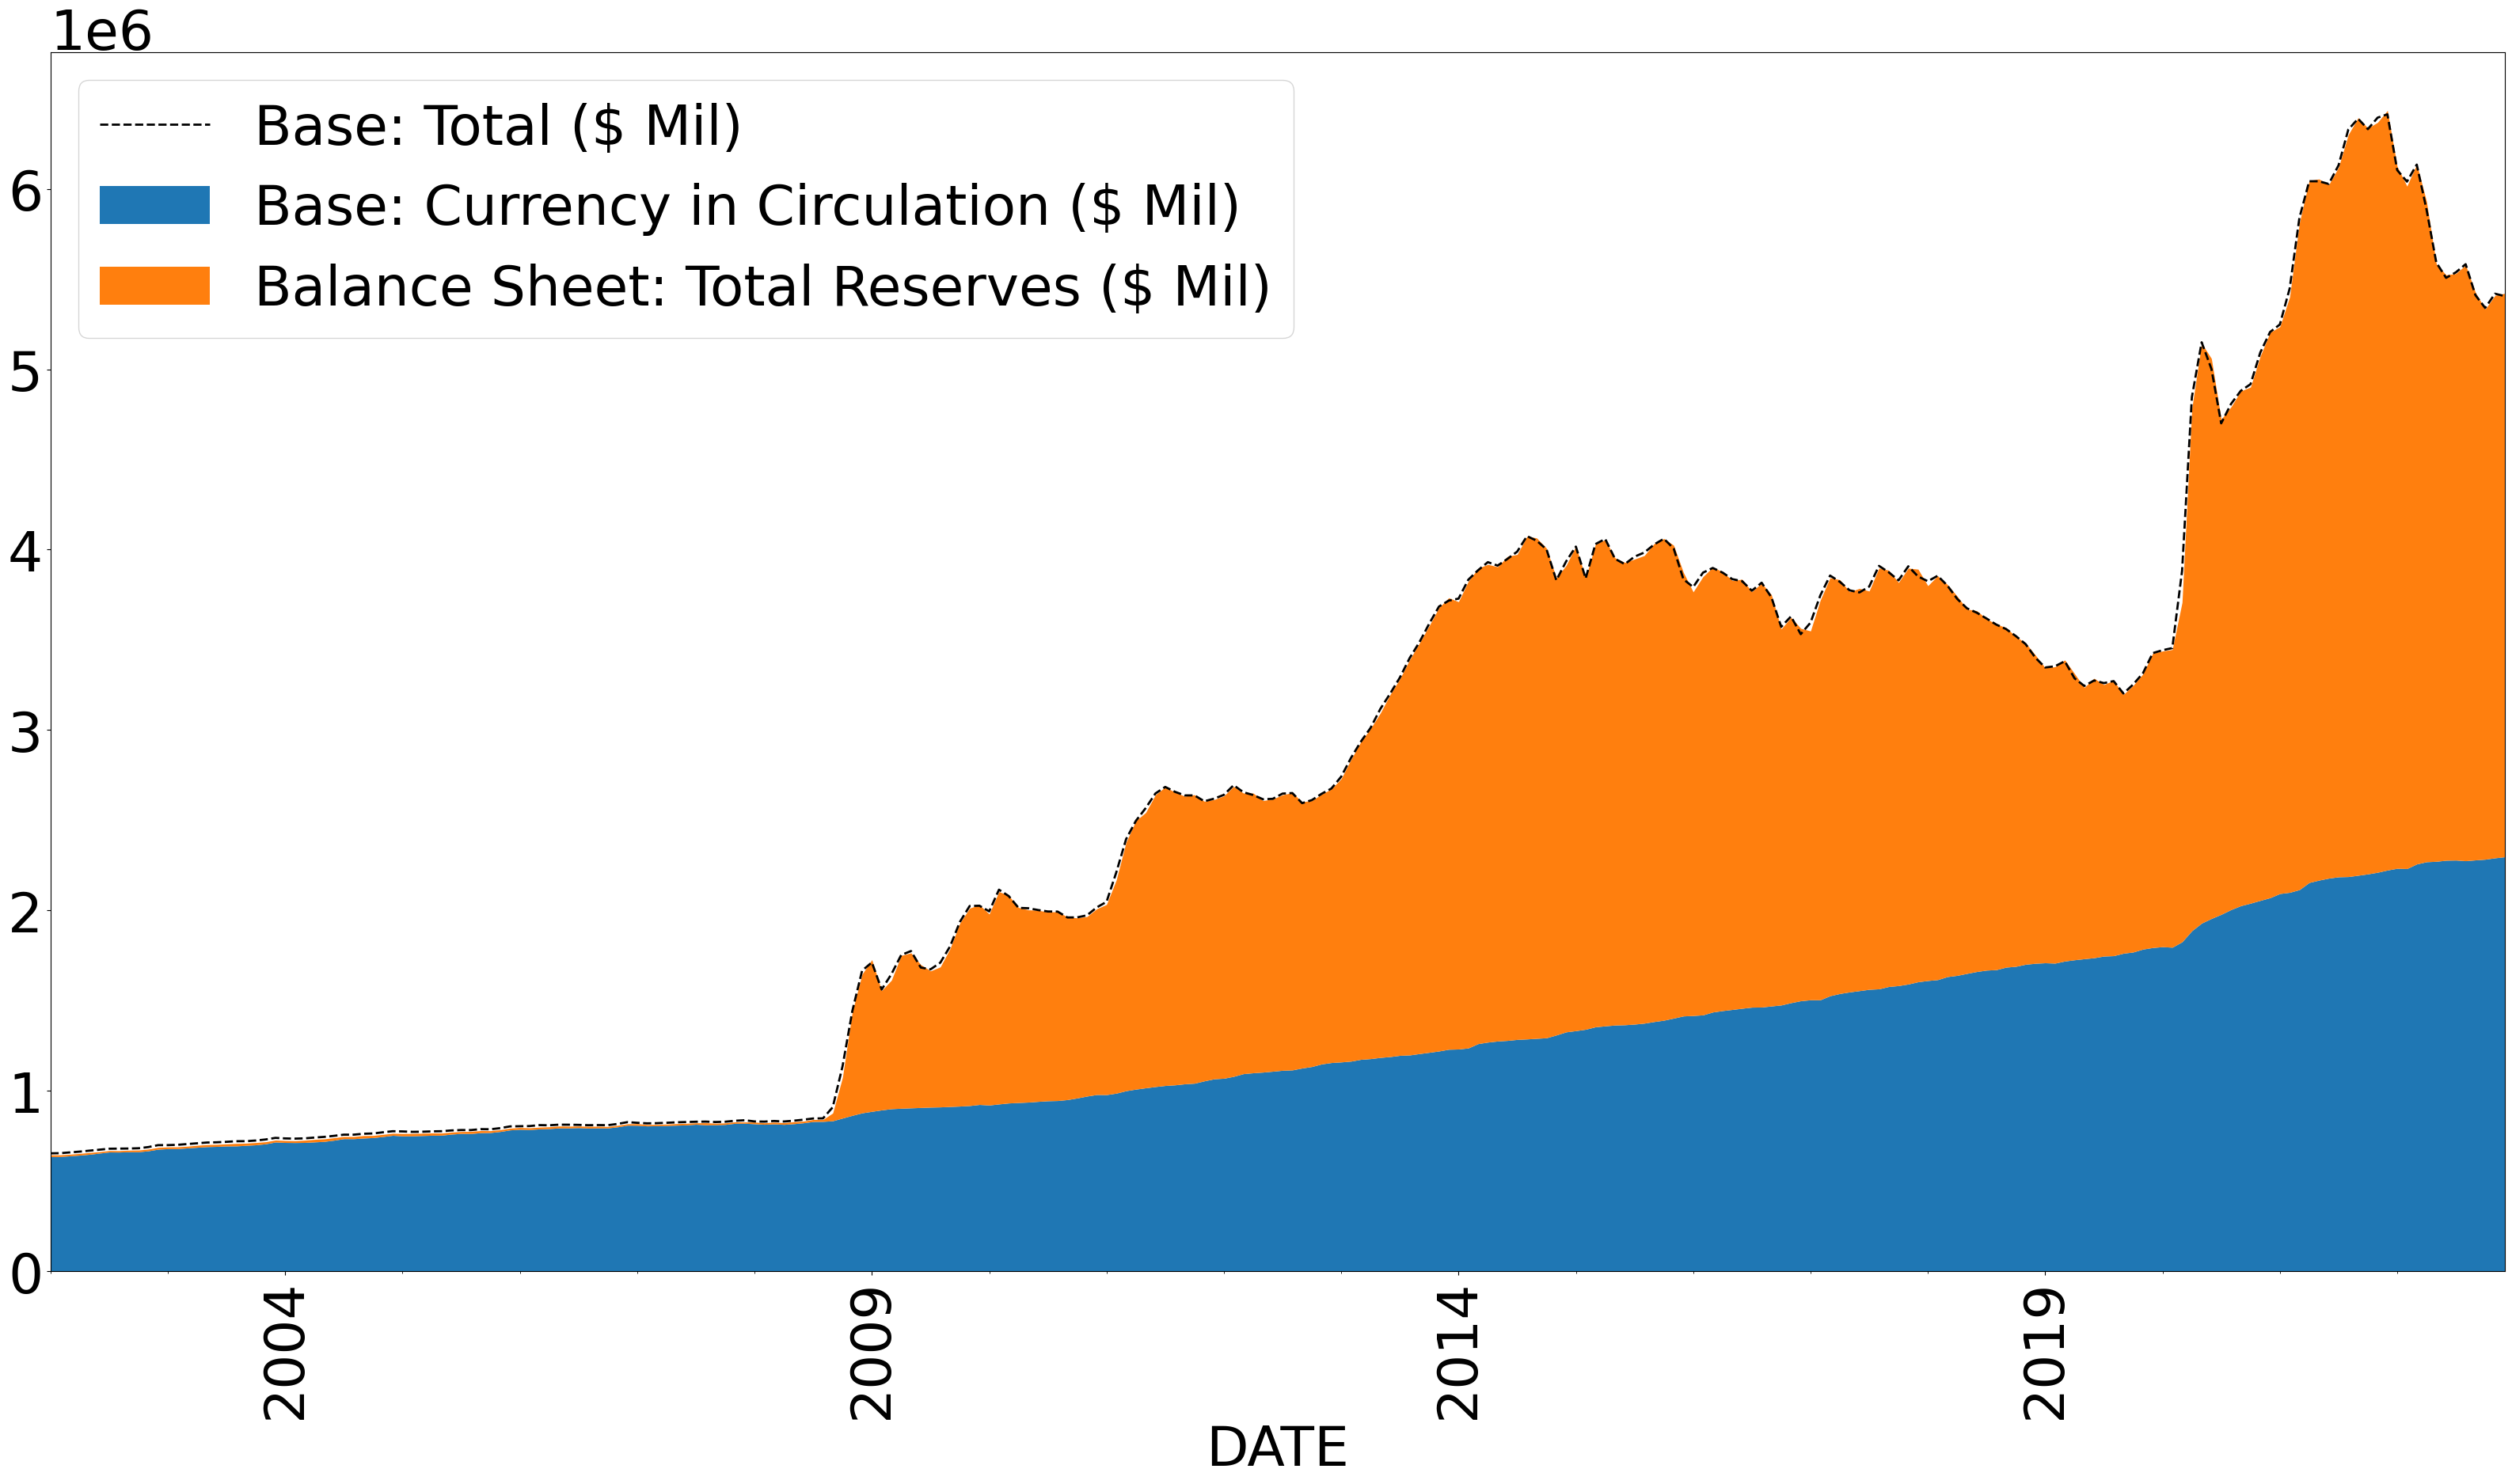

In [51]:
stack_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
fig, ax = plot_stacked(df = data, 
                       stack_vars = stack_vars, total_var = total_var)
plt.xticks(rotation = 90)

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_6856\546213954.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


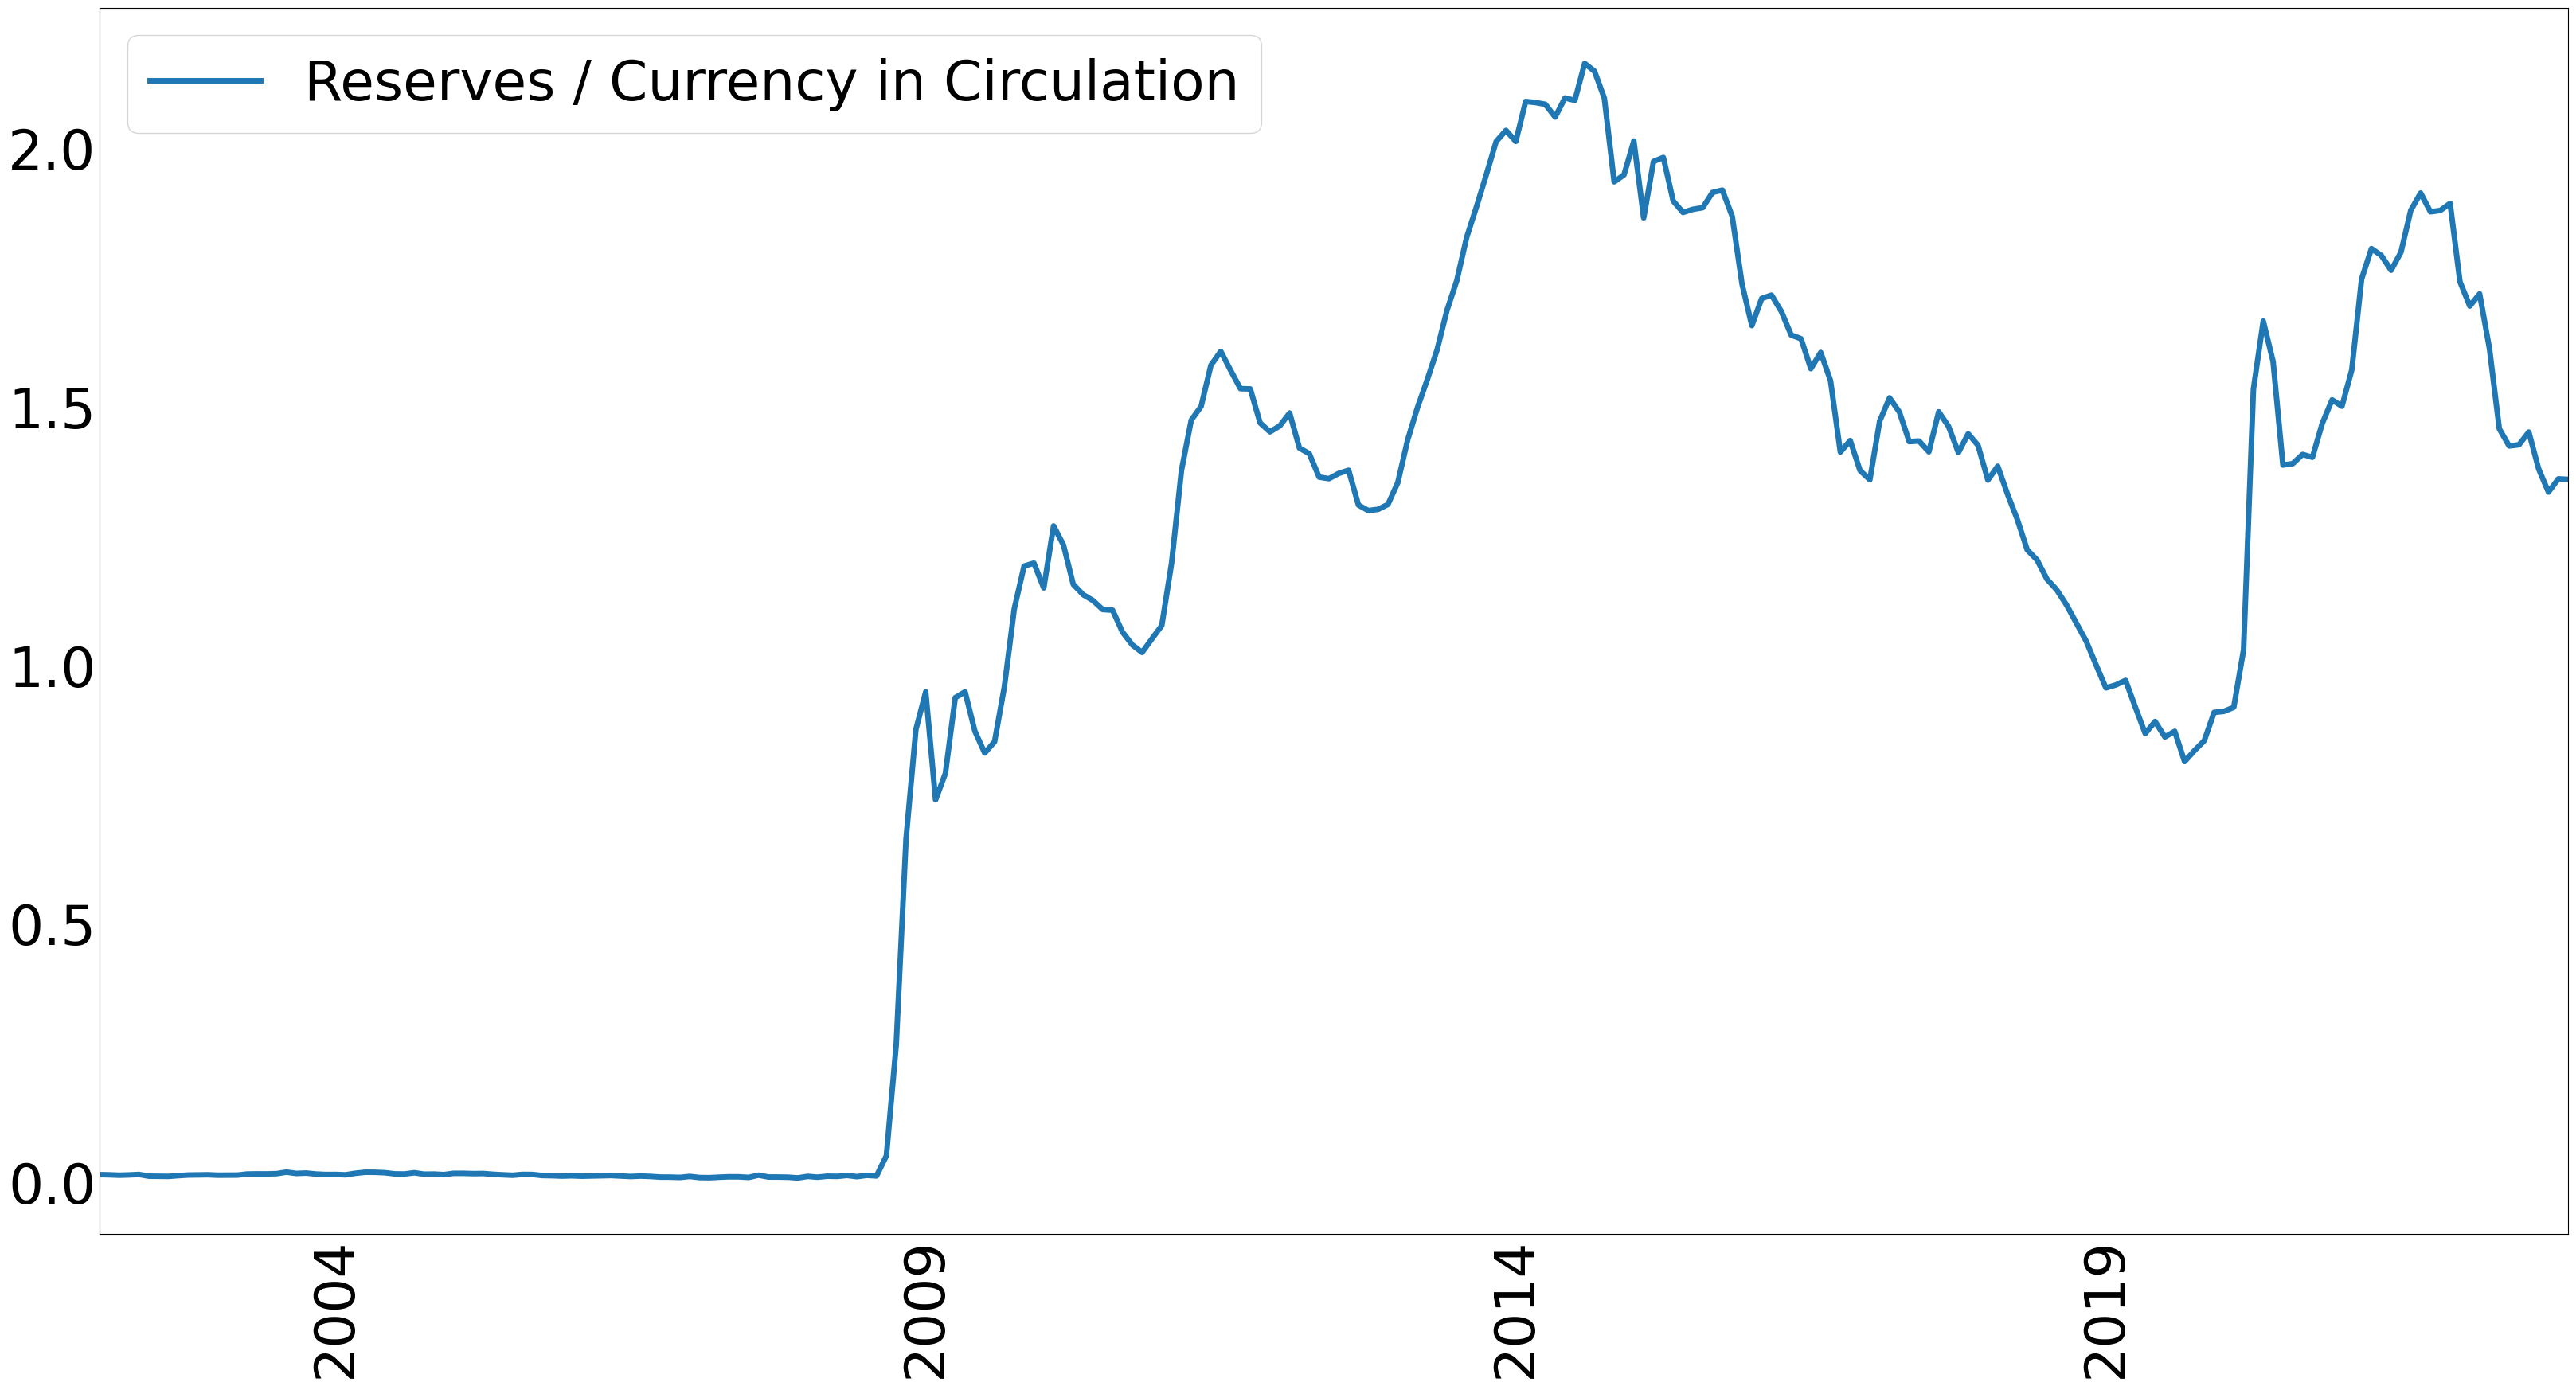

In [58]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_df = data[reserve_vars]
fig, ax = plot_lines(plot_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:xlabel='DATE'>)

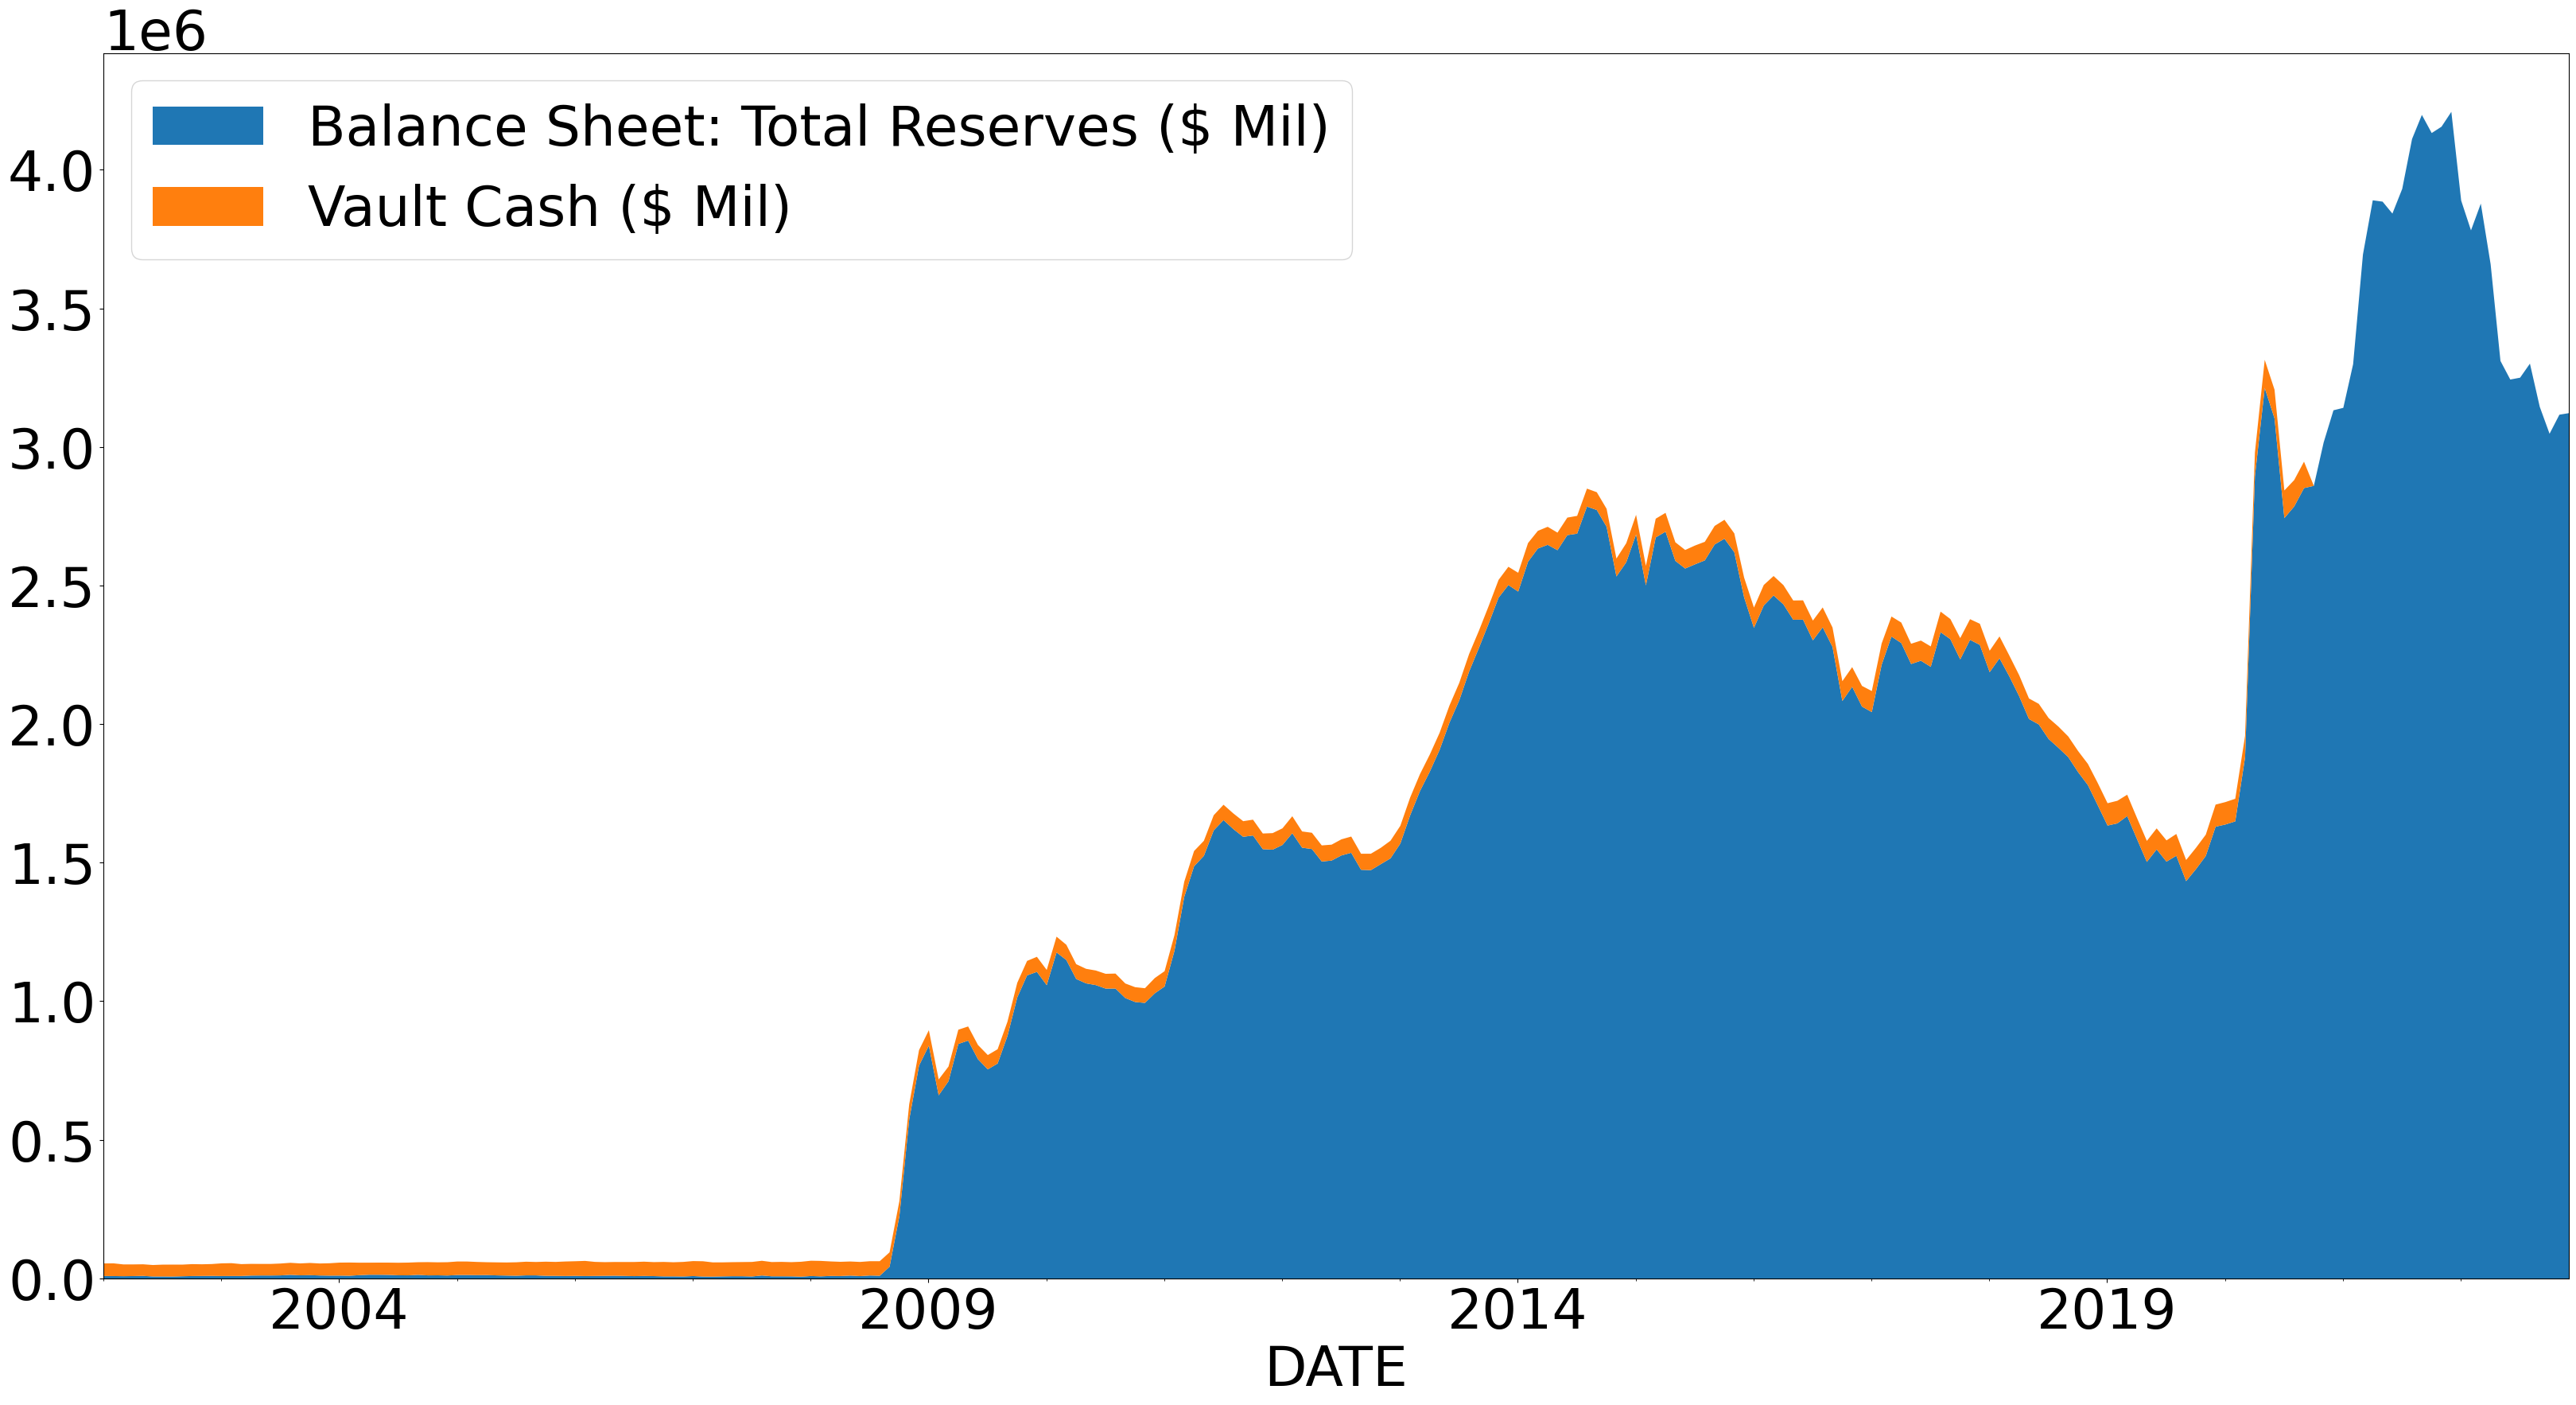

In [61]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]

plot_data = data[reserve_vars]
plot_stacked(plot_data, reserve_vars)

In [63]:
plot_data
# vault cash has a disappearing statement of vault cash

Balance Sheet: Total Reserves ($ Mil)  Vault Cash ($ Mil)
DATE                                                                 
2002-01-31                                9613.80            45416.20
2002-02-28                                9355.75            45947.00
2002-03-31                                8920.50            42567.25
2002-04-30                                9339.75            42146.25
2002-05-31                               10013.00            41926.20
...                                           ...                 ...
2022-08-31                             3301985.40                 NaN
2022-09-30                             3146264.00                 NaN
2022-10-31                             3048917.00                 NaN
2022-11-30                             3117723.40                 NaN
2022-12-31                             3123548.00                 NaN

[252 rows x 2 columns]

## Assets Held by the Fed

In [81]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)", 
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
plot_data

Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2022-08-31                                       8428802.60   
2022-09-30                                       8393452.25   
2022-10-31                                       8316832.75   
2022-11-30                                       8222611.80   
2022-12-31                                       8162878.50   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2022-08-31                                         5706898.20      
2022-09-30                                         5680889.50      
2022-10-31                                         5621114.50      
2022-11-30                                         5547311.00      
2022-12-31                                         5507528.50      

            Balance Sheet: Federal Agency Debt Securities ($ Mil)  \
DATE                                                                
2002-12-31                                               10.0       
2003-01-31                                               10.0       
2003-02-28                                               10.0       
2003-03-31                                               10.0       
2003-04-30                                               10.0       
...                                                       ...       
2022-08-31                                             2347.0       
2022-09-30                                             2347.0       
2022-10-31                                             2347.0       
2022-11-30                                             2347.0       
2022-12-31                                             2347.0       

            Balance Sheet: Mortgage-Backed Securities ($ Mil)  
DATE                                                           
2002-12-31                                               0.00  
2003-01-31                                               0.00  
2003-02-28                                               0.00  
2003-03-31                                               0.00  
2003-04-30                                               0.00  
...                                                       ...  
2022-08-31                                         2719557.40  
2022-09-30                                         2710215.50  
2022-10-31                                         2693371.50  
2022-11-30                                         2672953.40  
2022-12-31                                         2653003.25  

[241 rows x 4 columns]

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

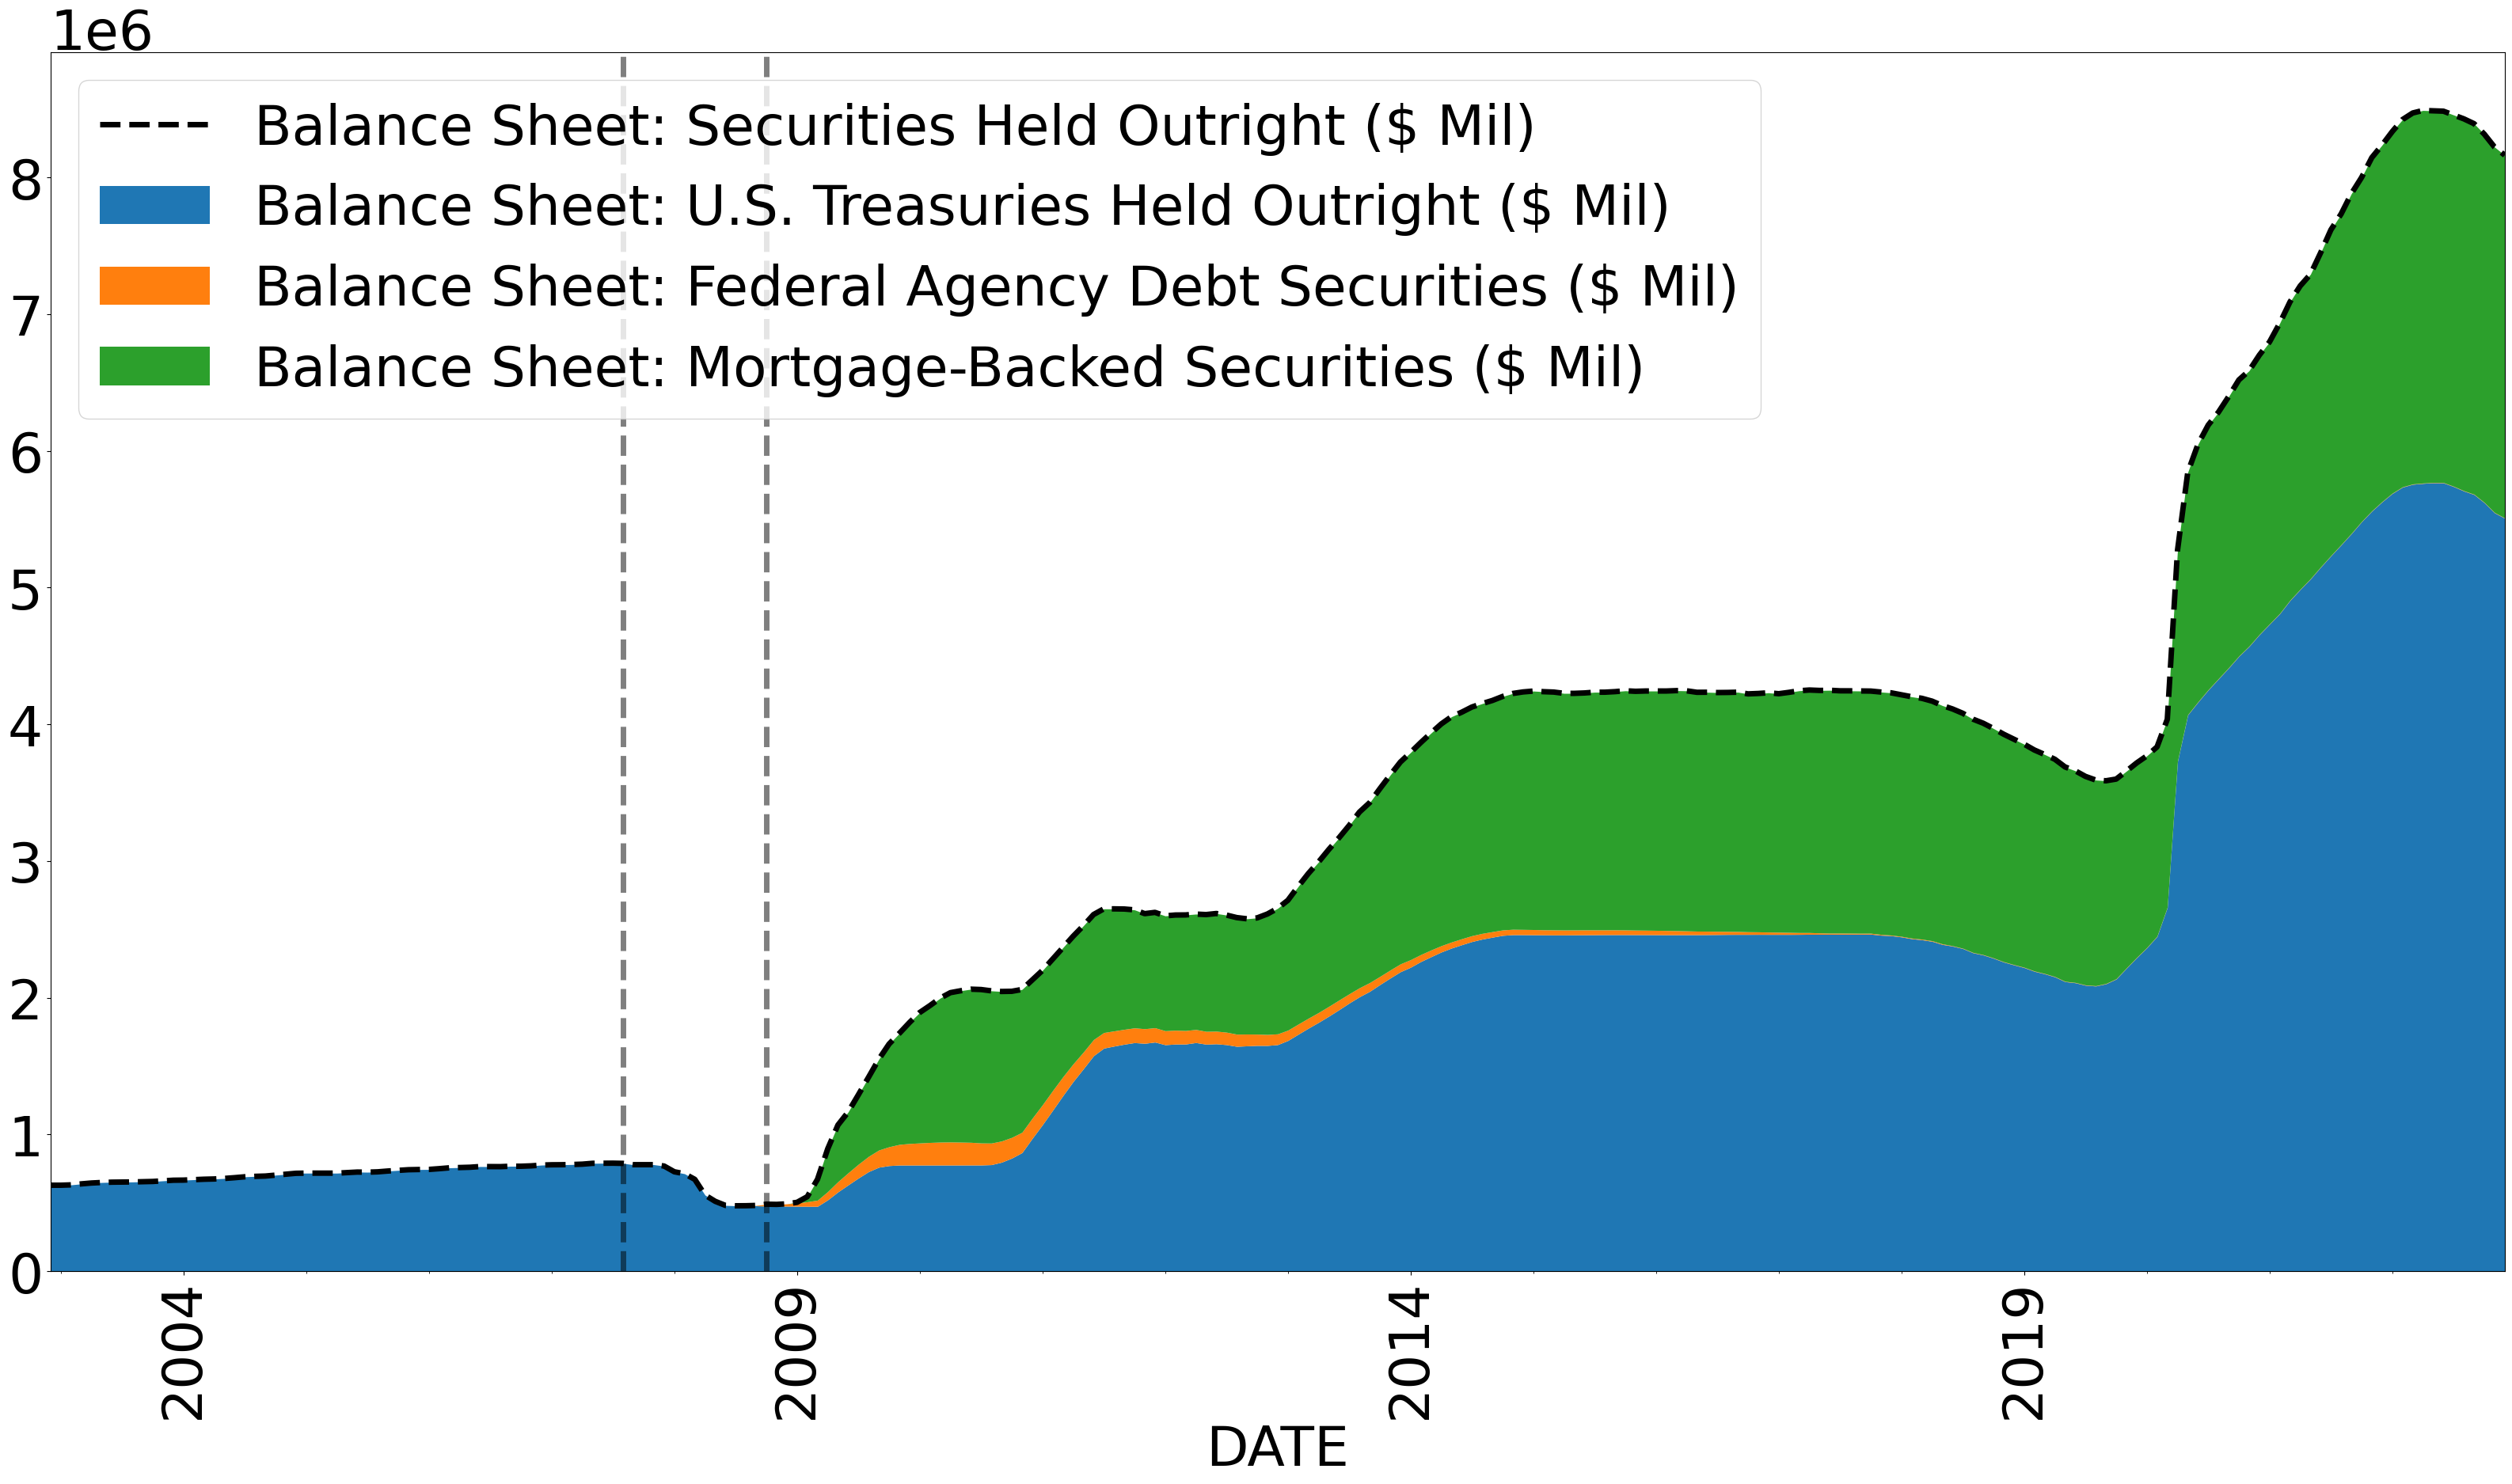

In [84]:
# Shows significant portion of assets held by Fed over time
# Heavily influences the realestate market through investment


#importing from csv makes the date unrecognizable.
#you need to run another code


# make sure that you explicitly make the variable = the other so you avoid problems
fig, ax = plot_stacked(df = plot_data, 
                       linewidth = 5, 
                       stack_vars = stack_vars,
                       total_var = total_var)
ax.axvline("2007-08-01", ls= "--", color = "k", linewidth = 5, alpha = .5)
ax.axvline("2008-10-01", ls= "--", color = "k", linewidth = 5, alpha = .5)
plt.xticks(rotation = 90)

## Going to remaining assets from securities

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

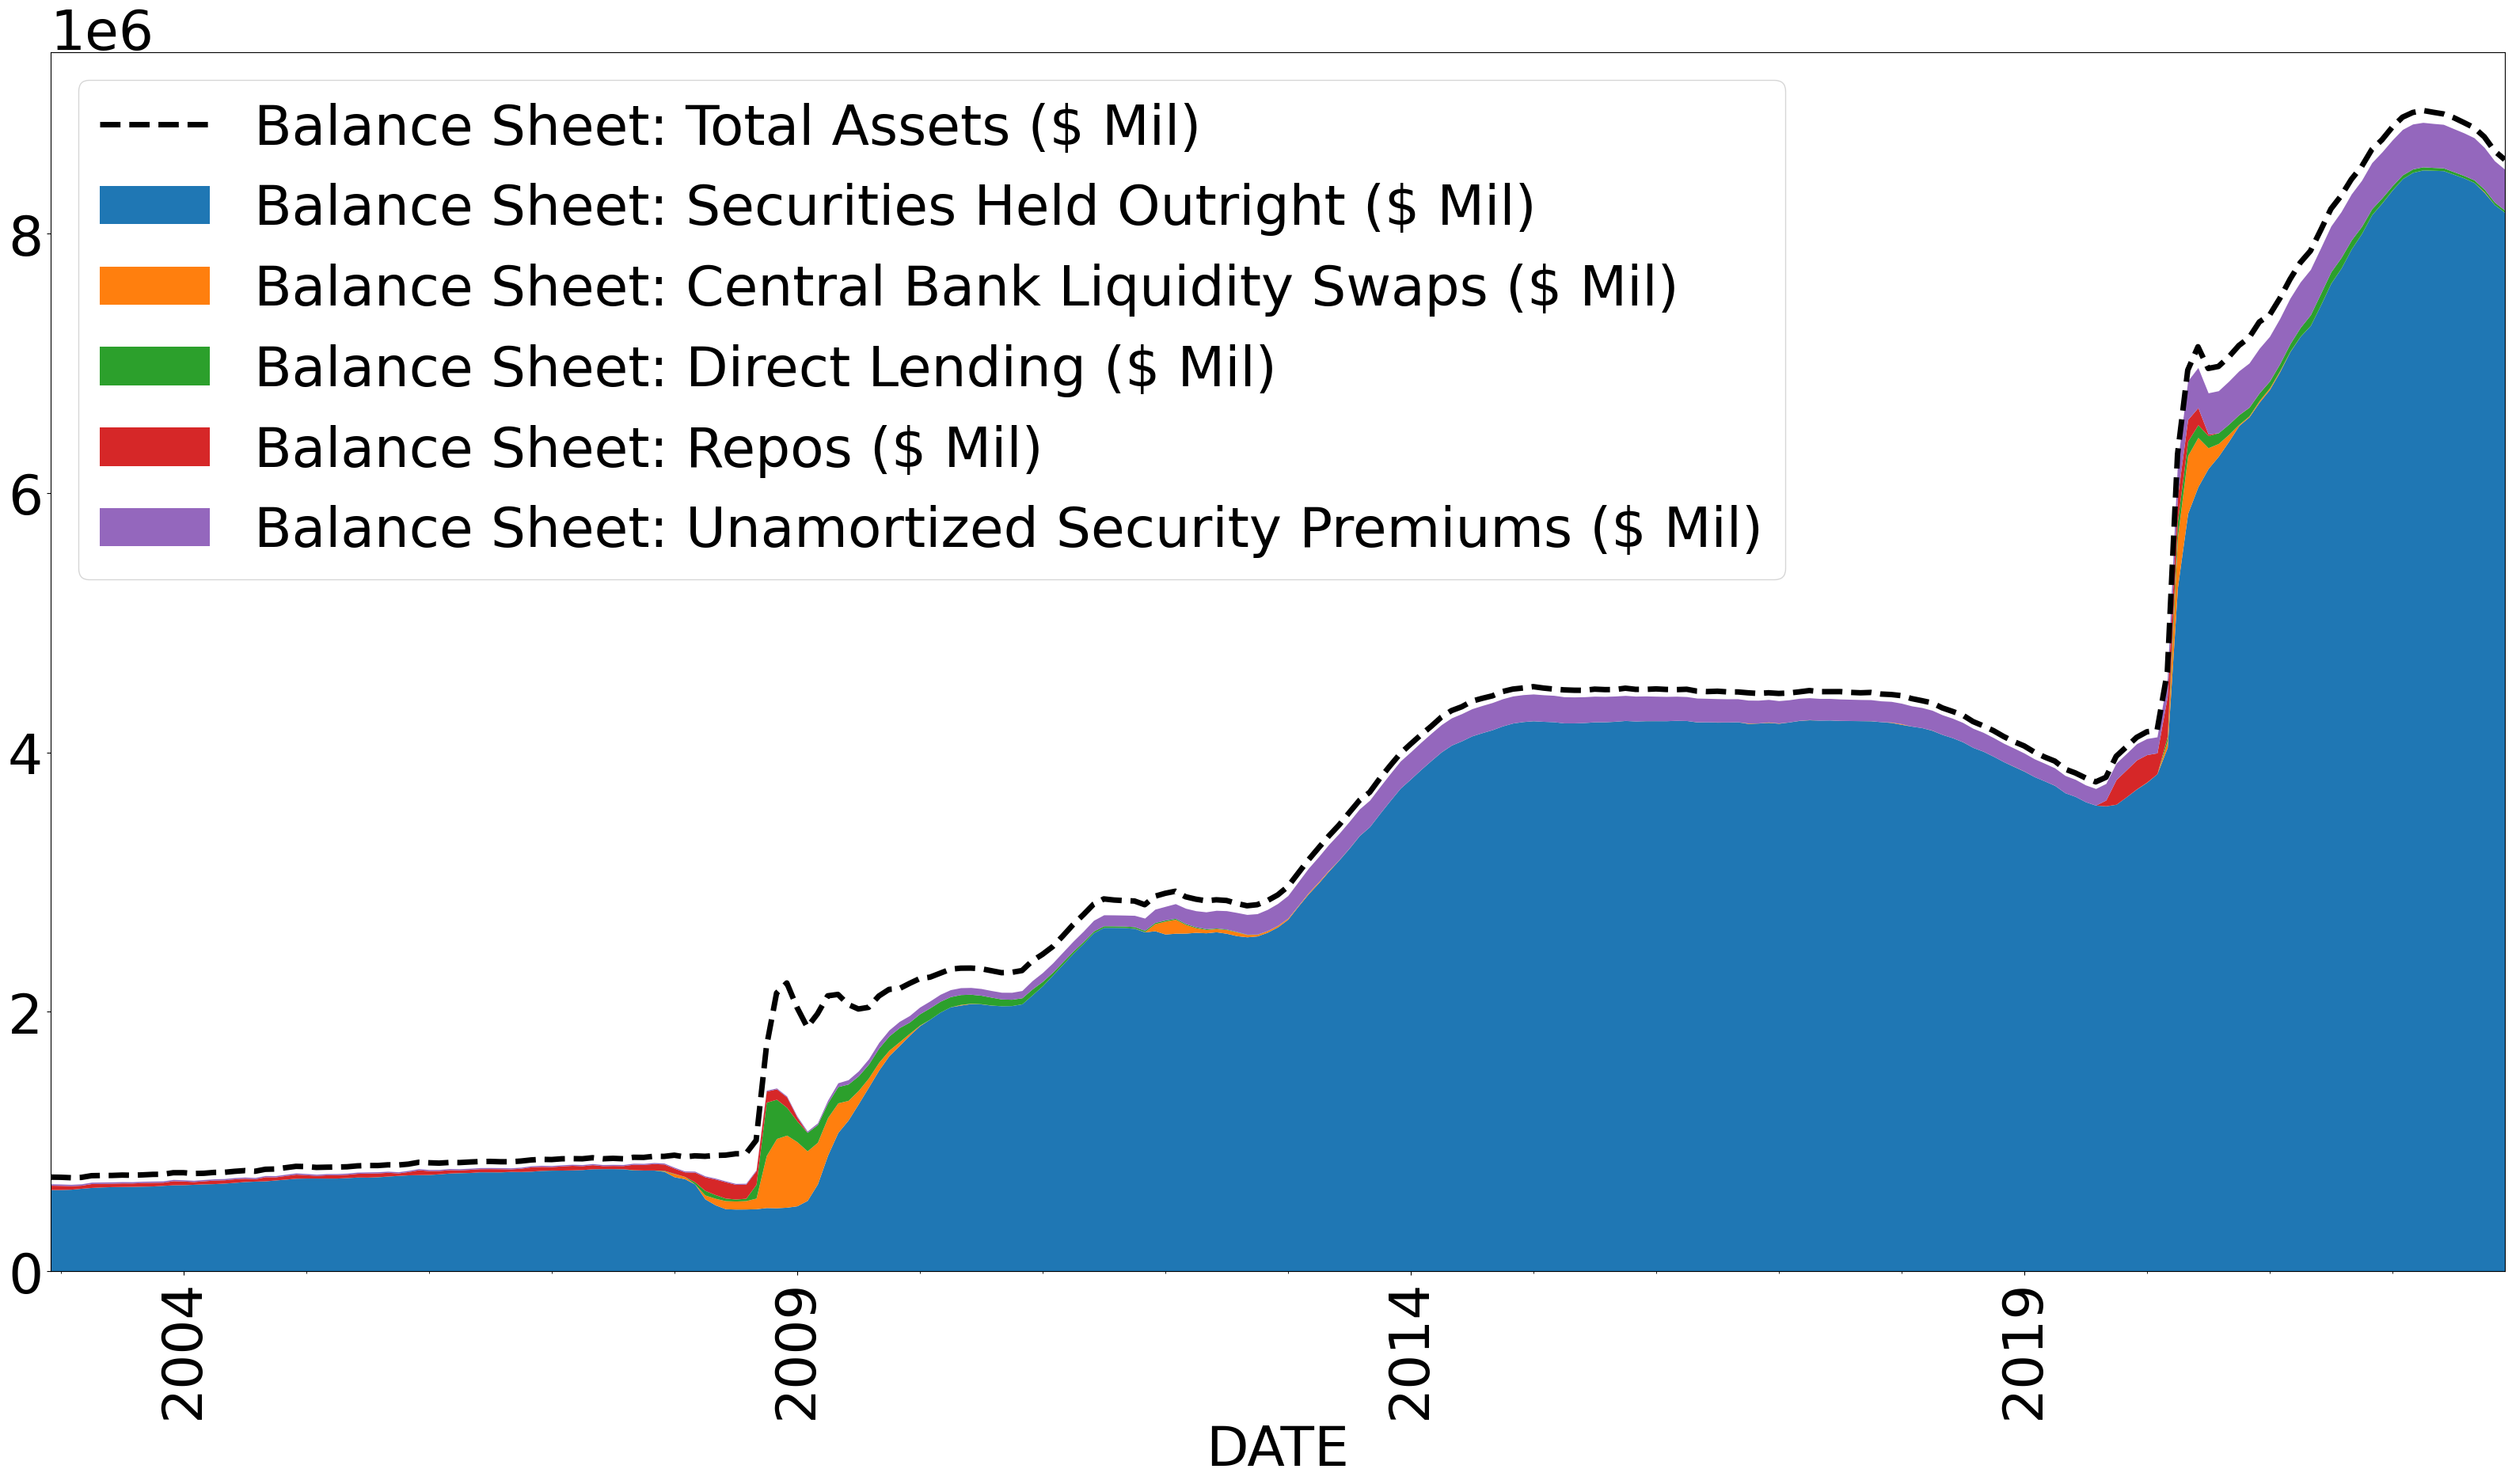

In [93]:
account_vars = ["Balance Sheet: Total Assets ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)
plt.xticks(rotation = 90)

## Total Liabilities of the Fed

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

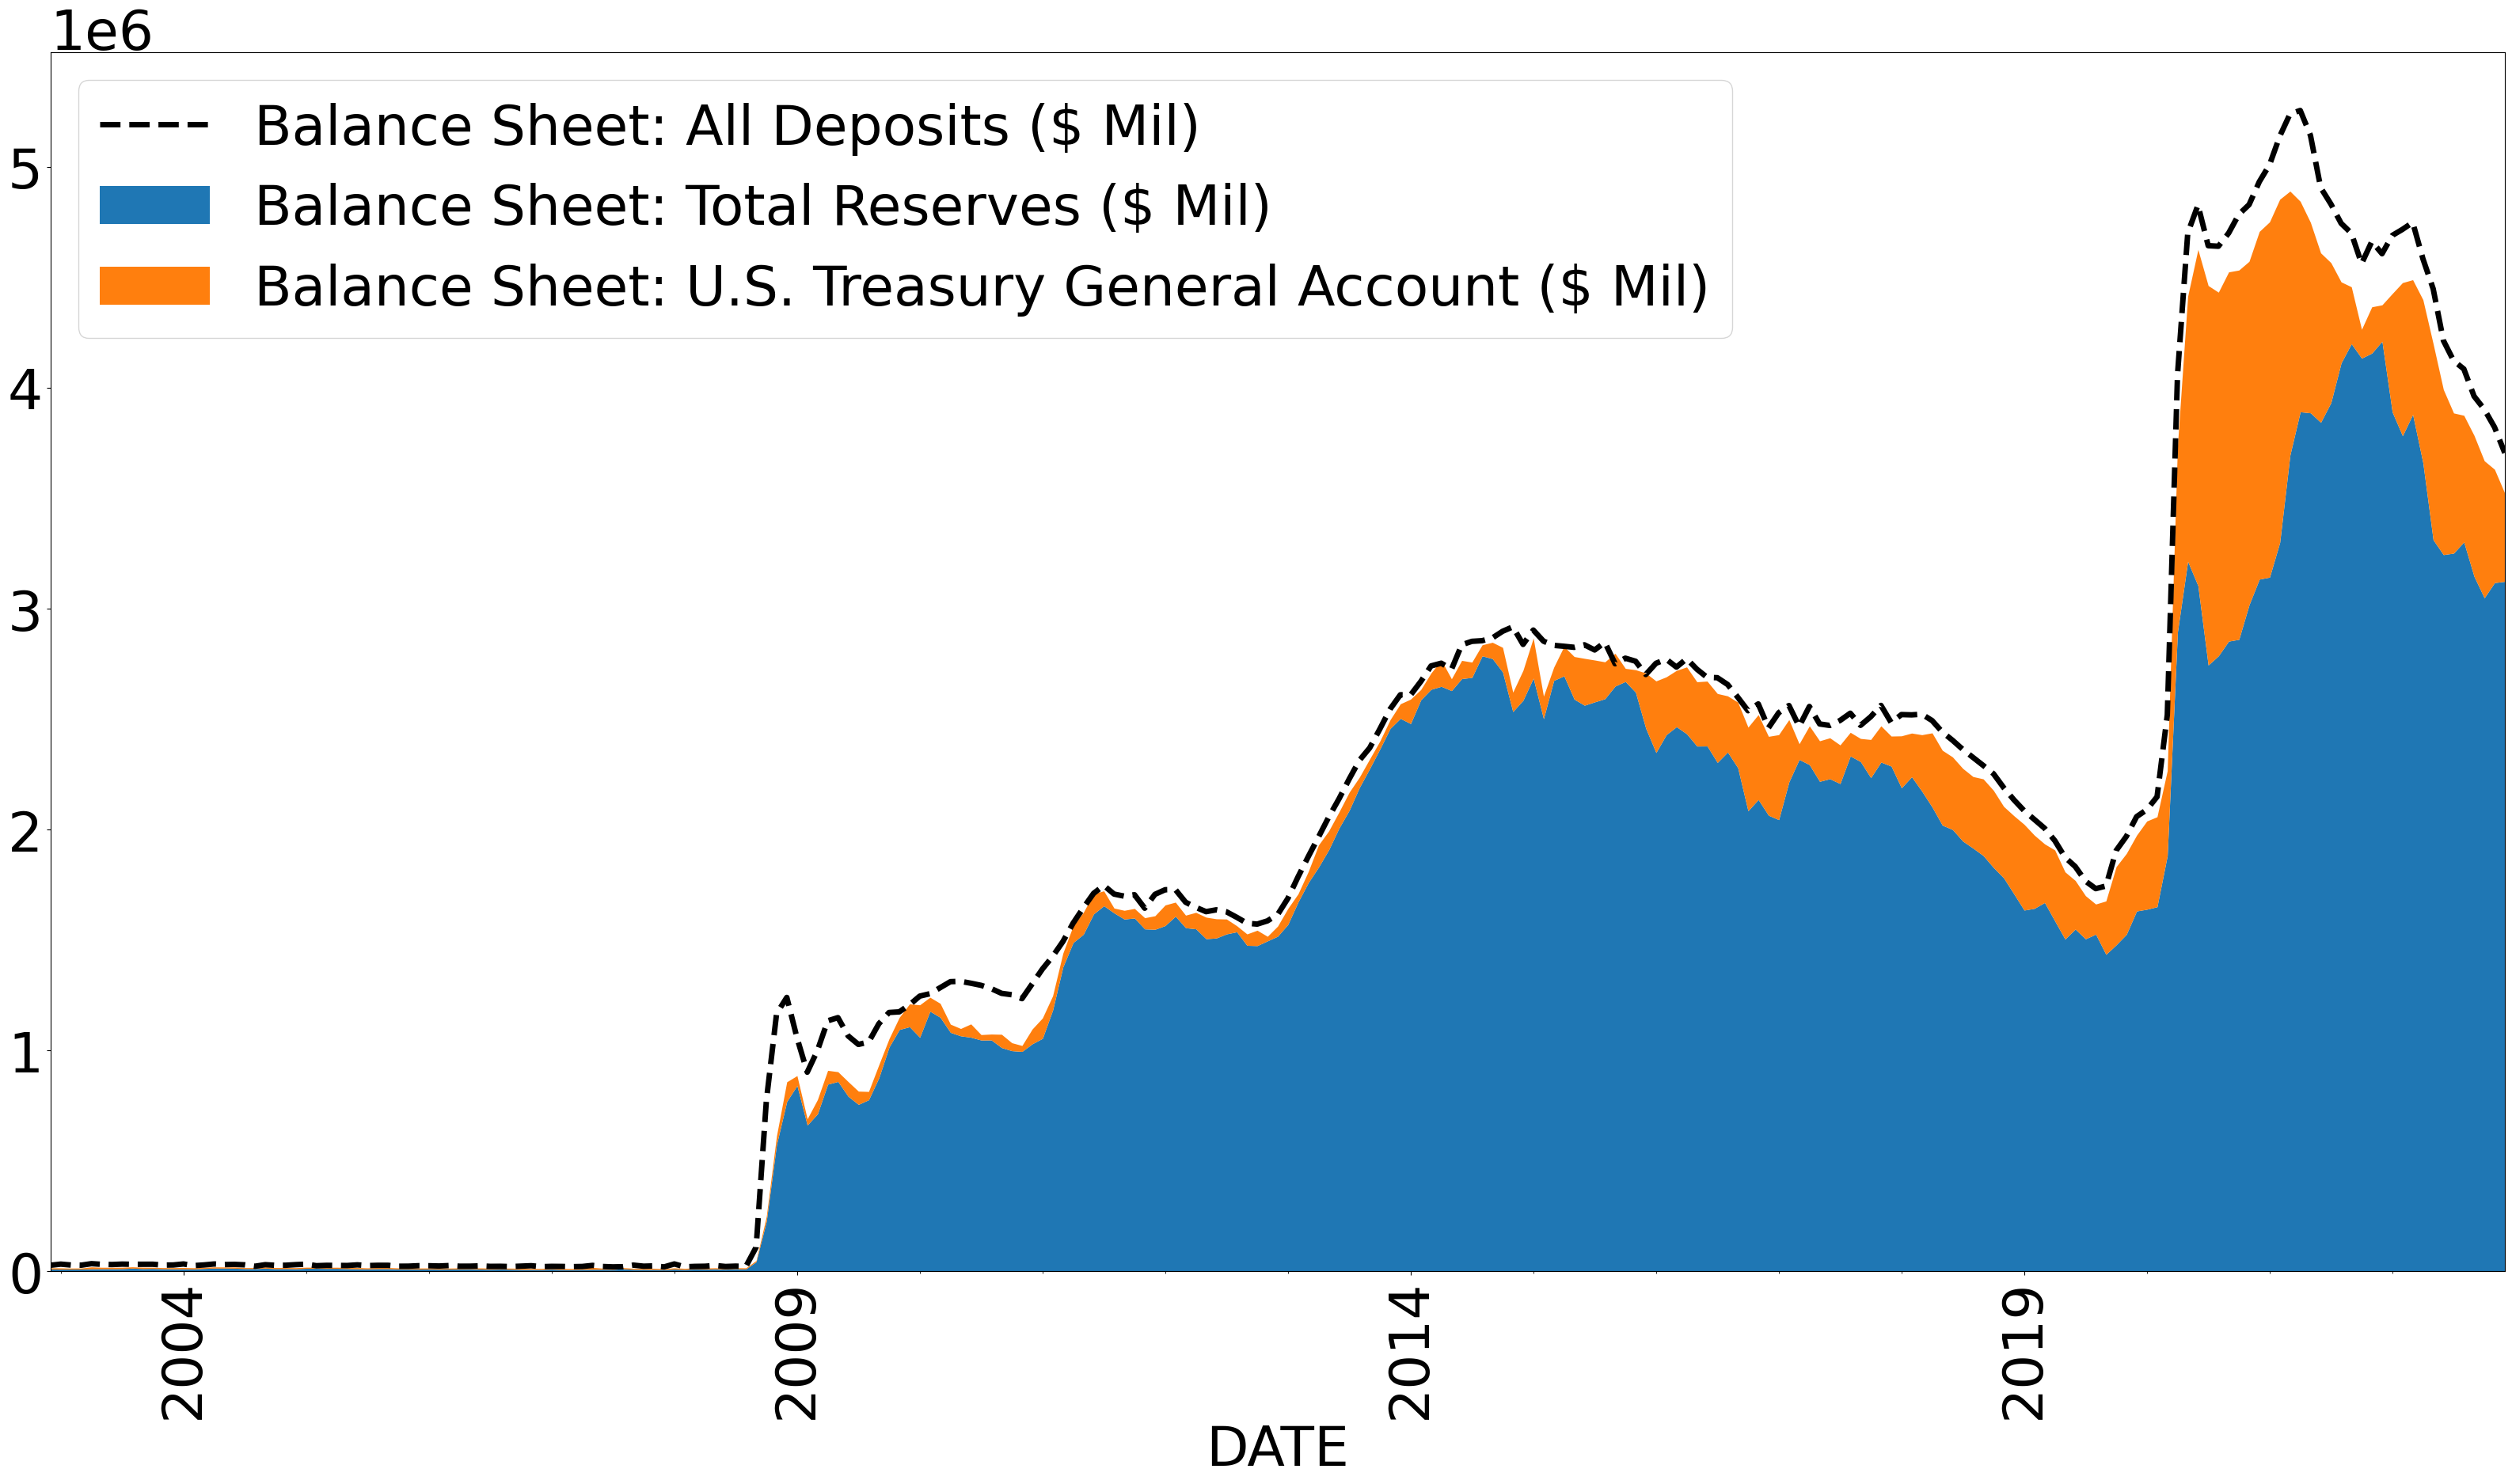

In [94]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)
plt.xticks(rotation = 90)

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

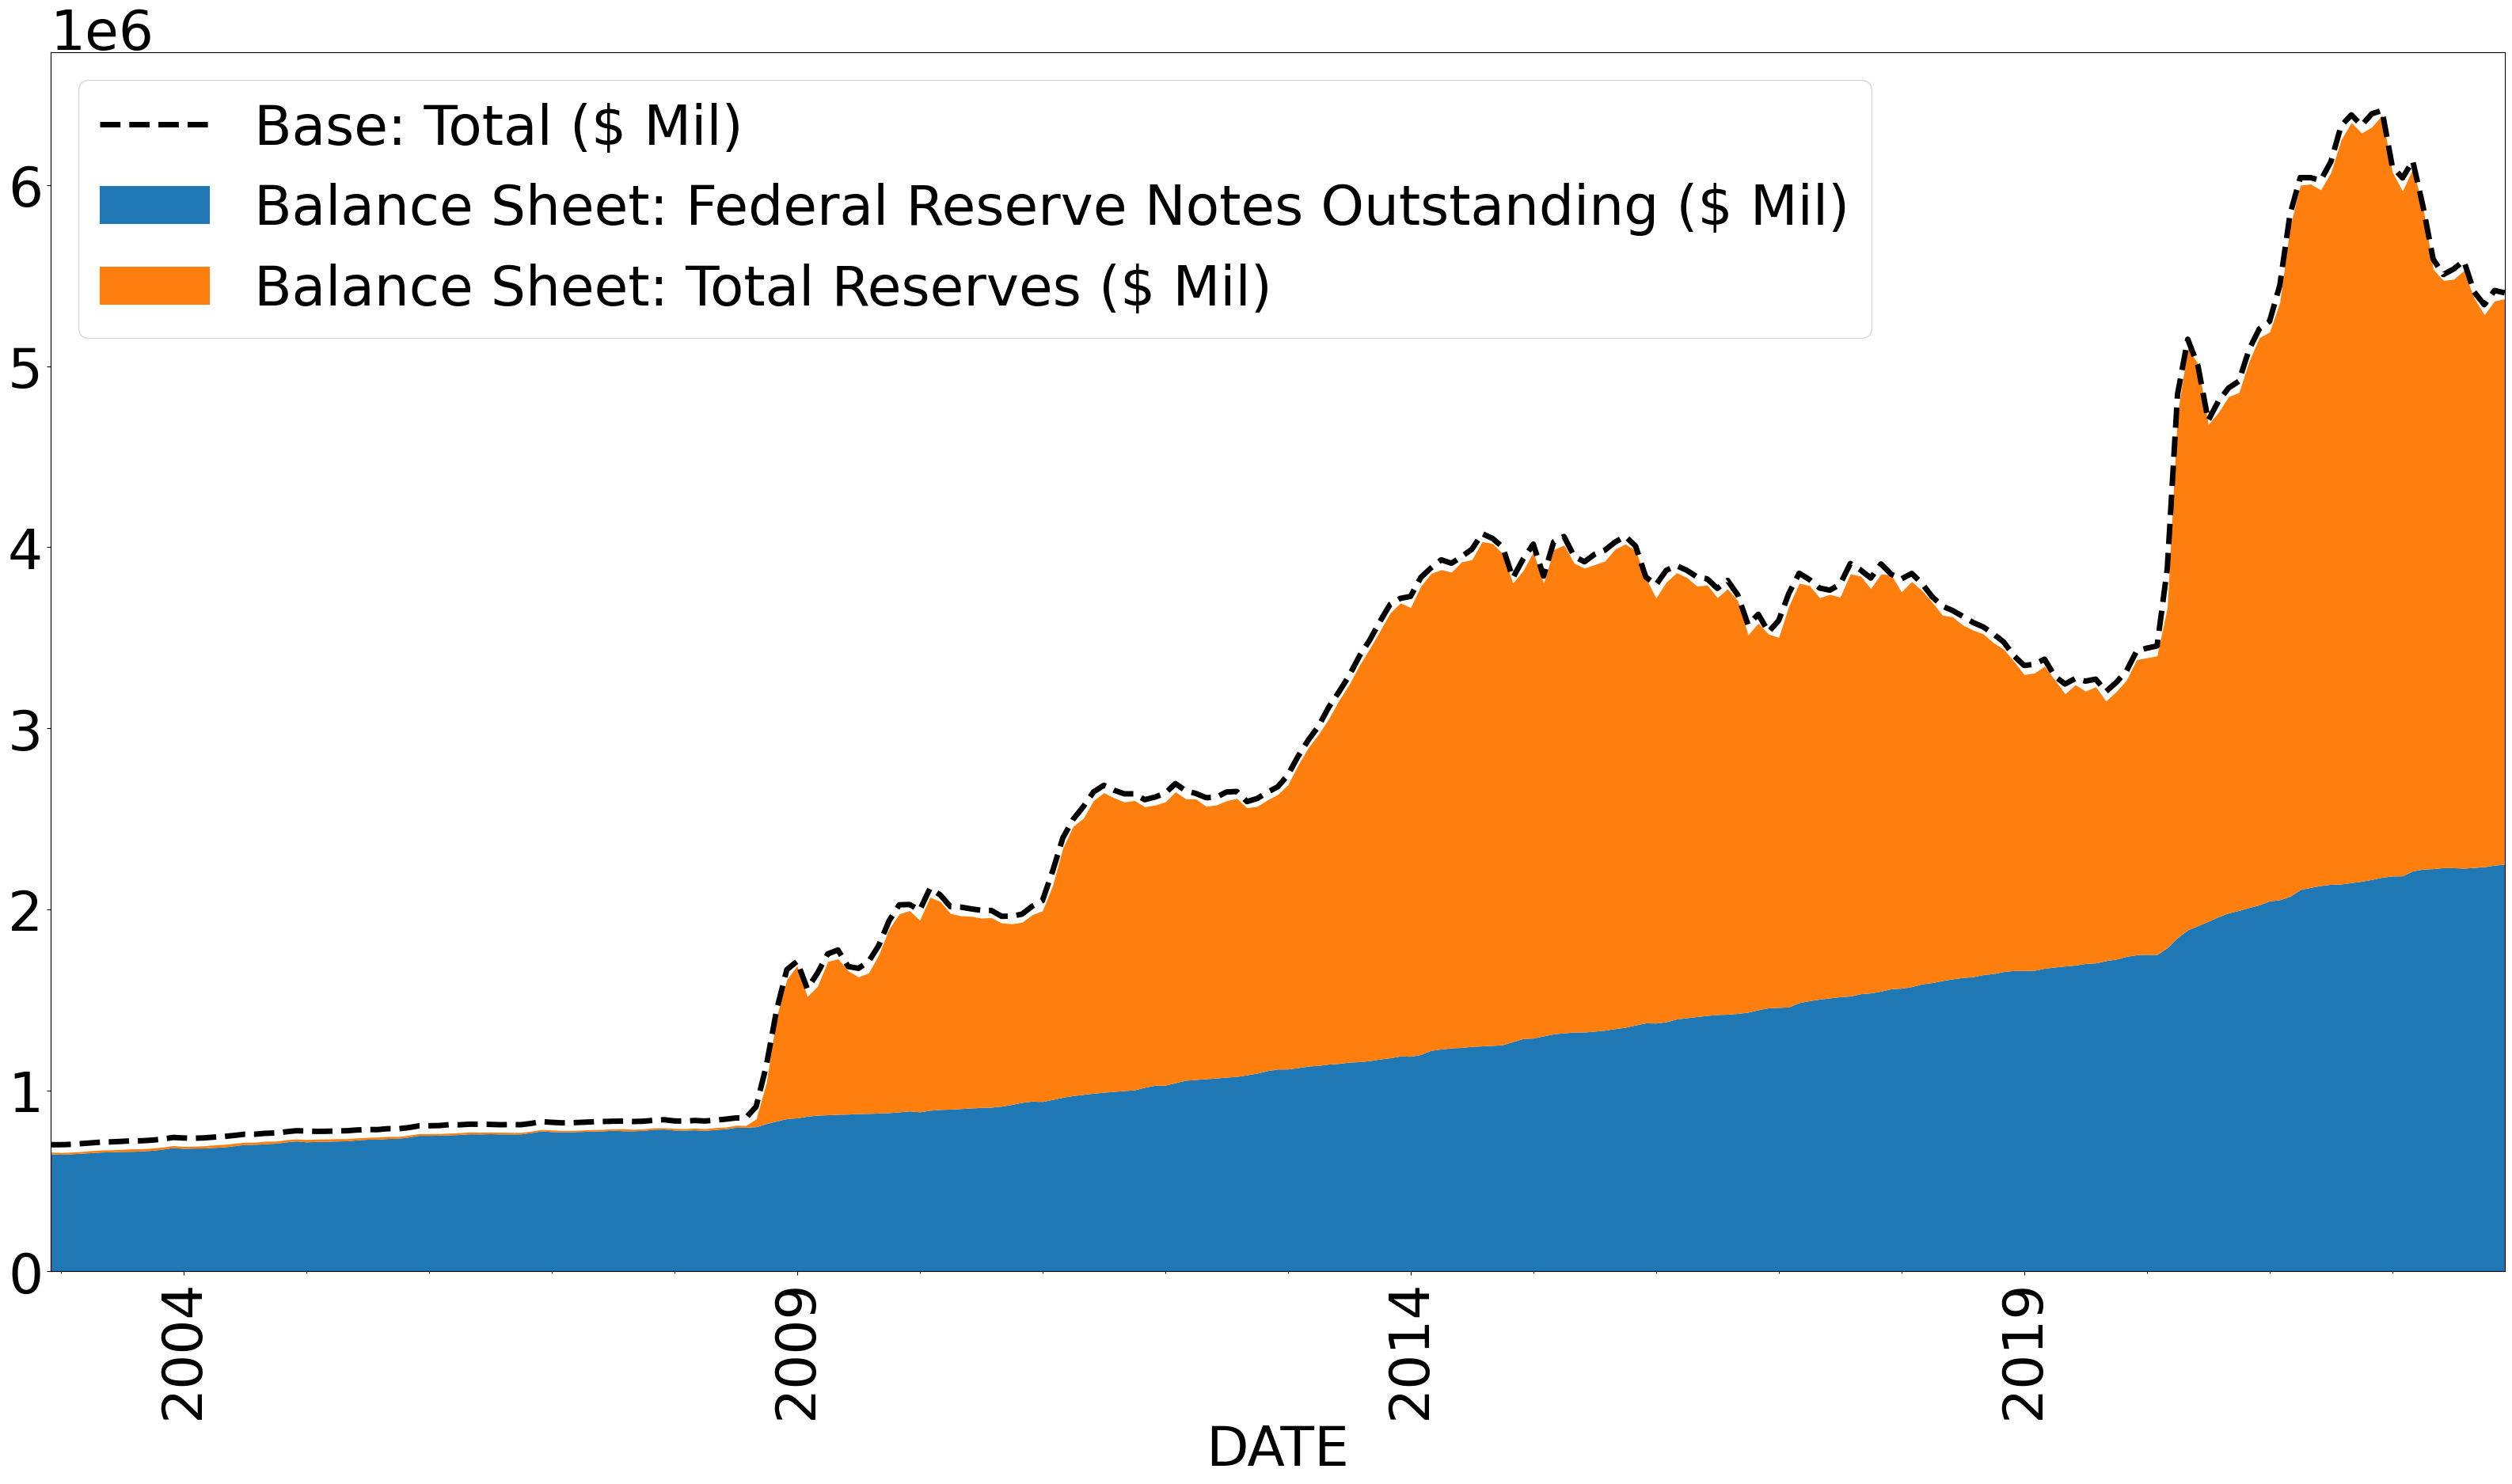

In [98]:
account_vars = ["Base: Total ($ Mil)",
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)
plt.xticks(rotation = 90)

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

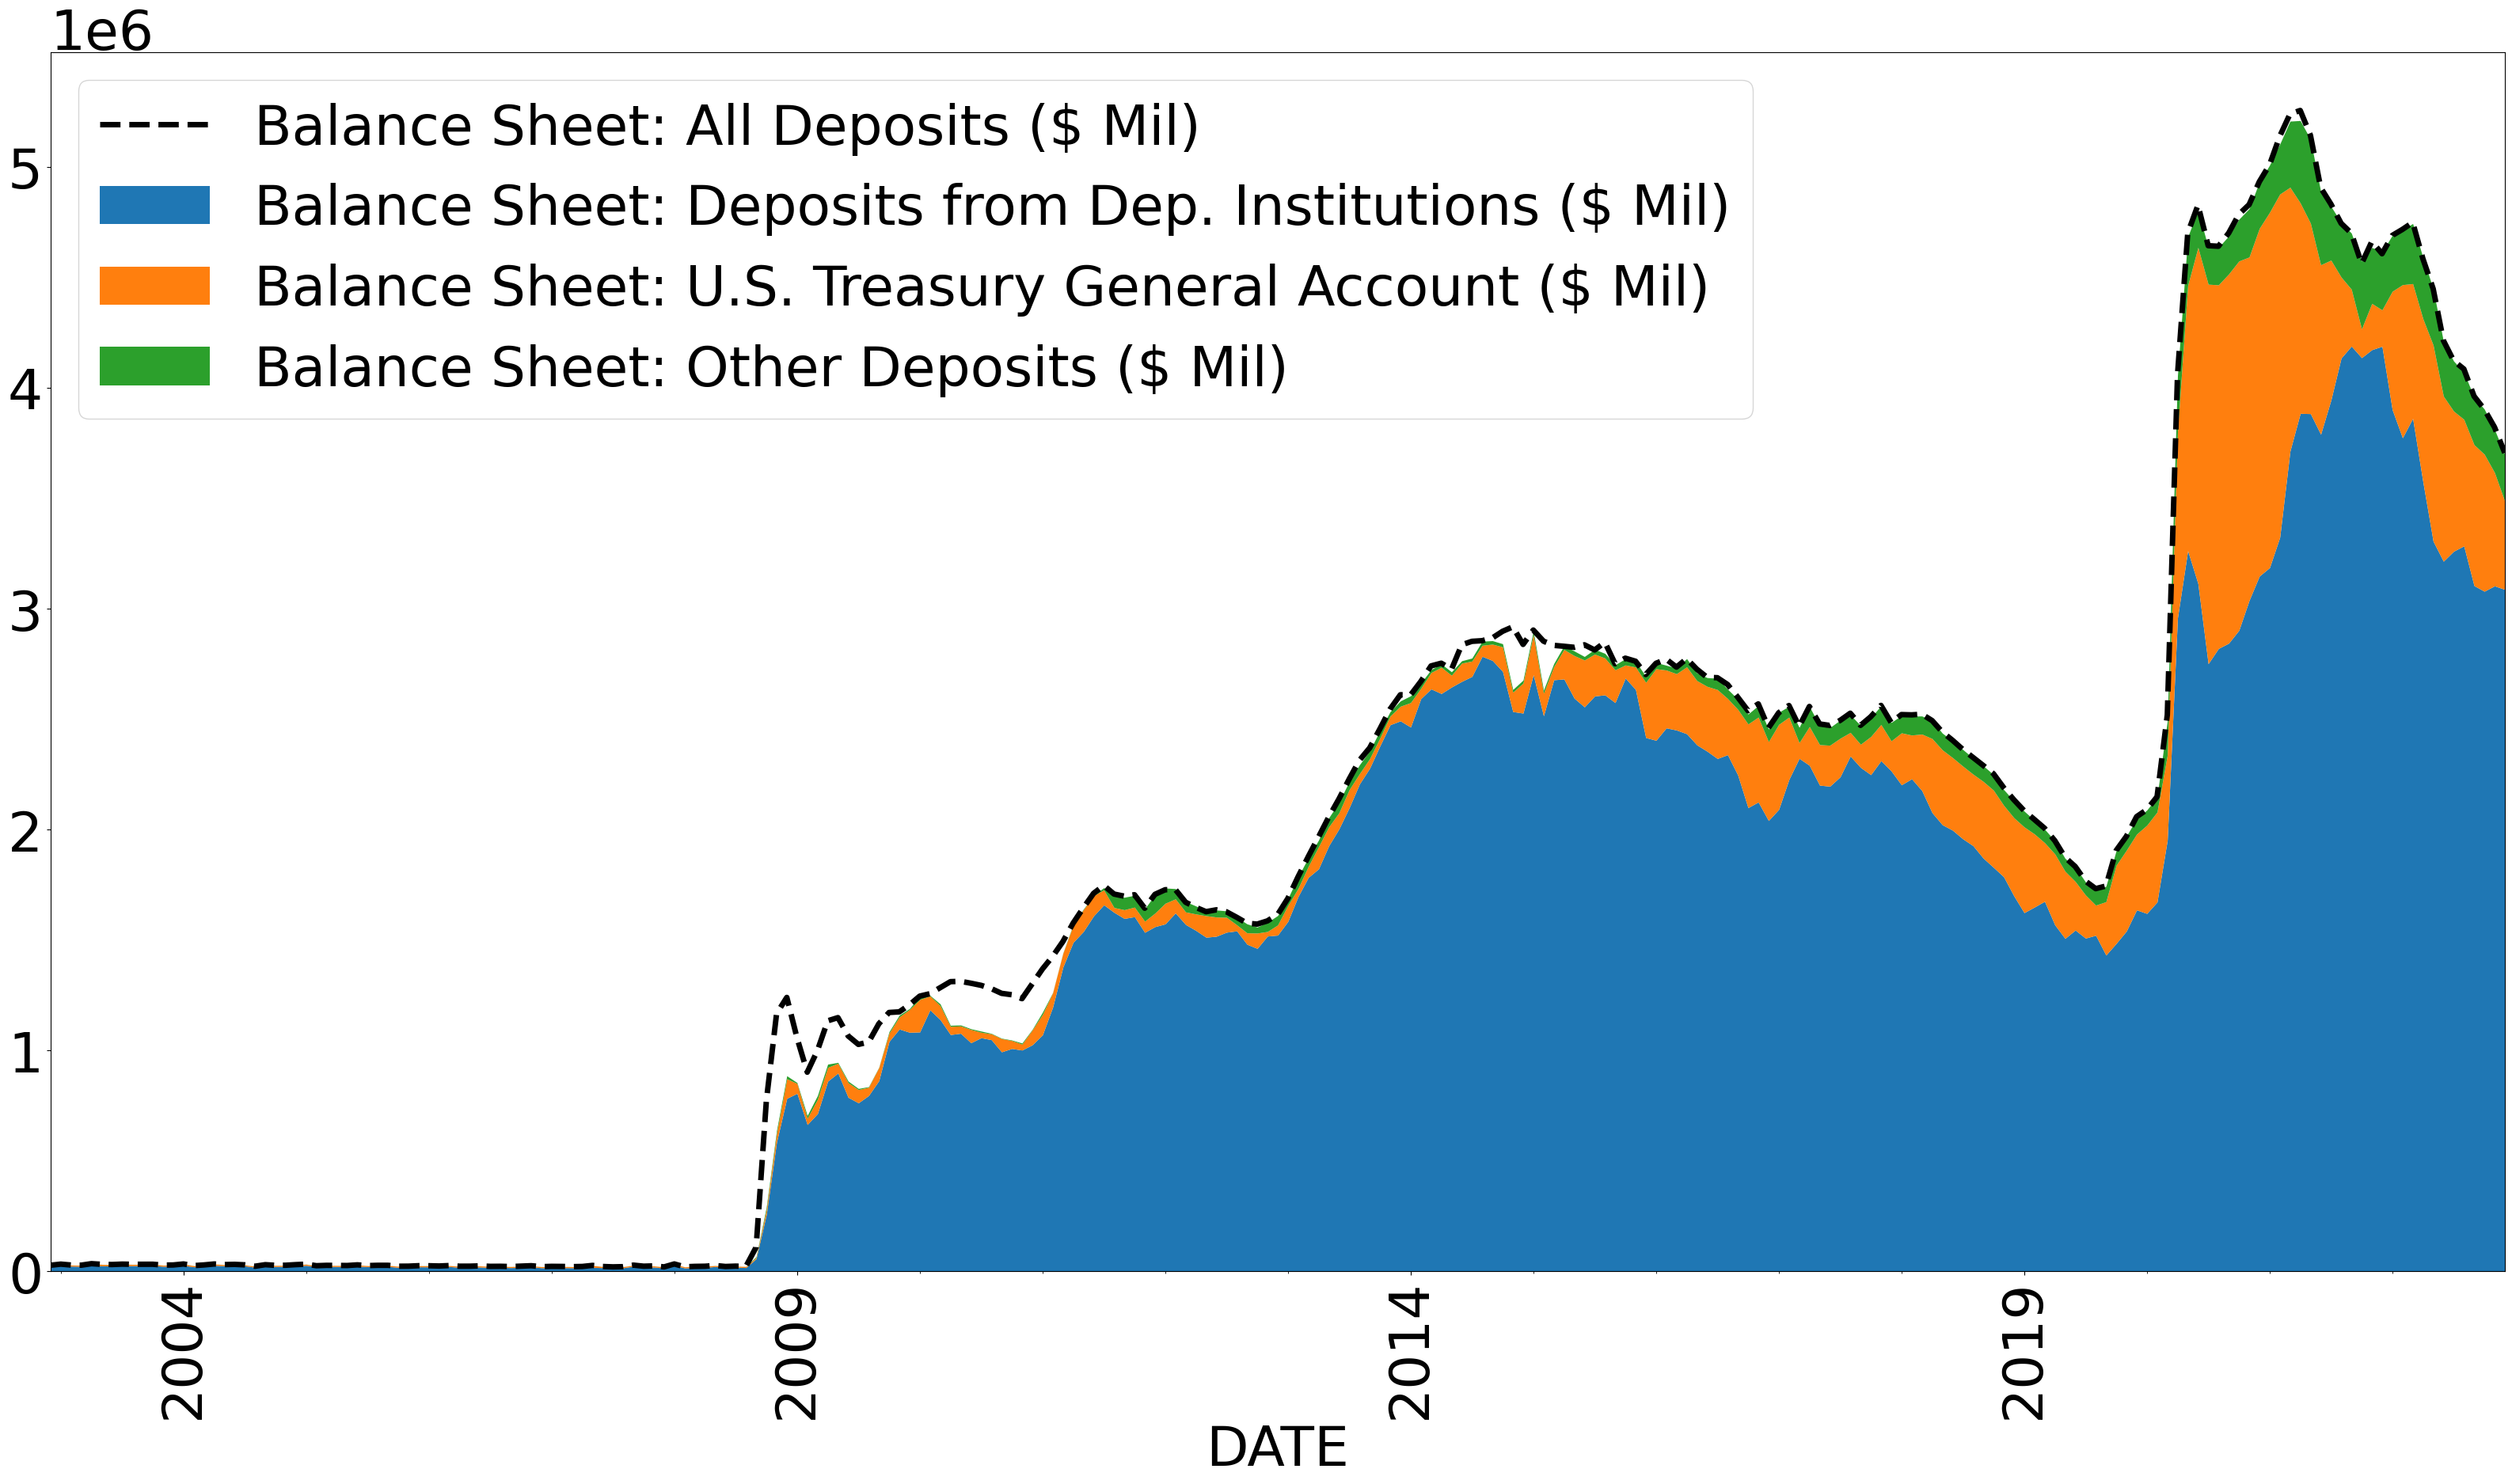

In [100]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)
plt.xticks(rotation = 90)

(array([408, 468, 528, 588]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

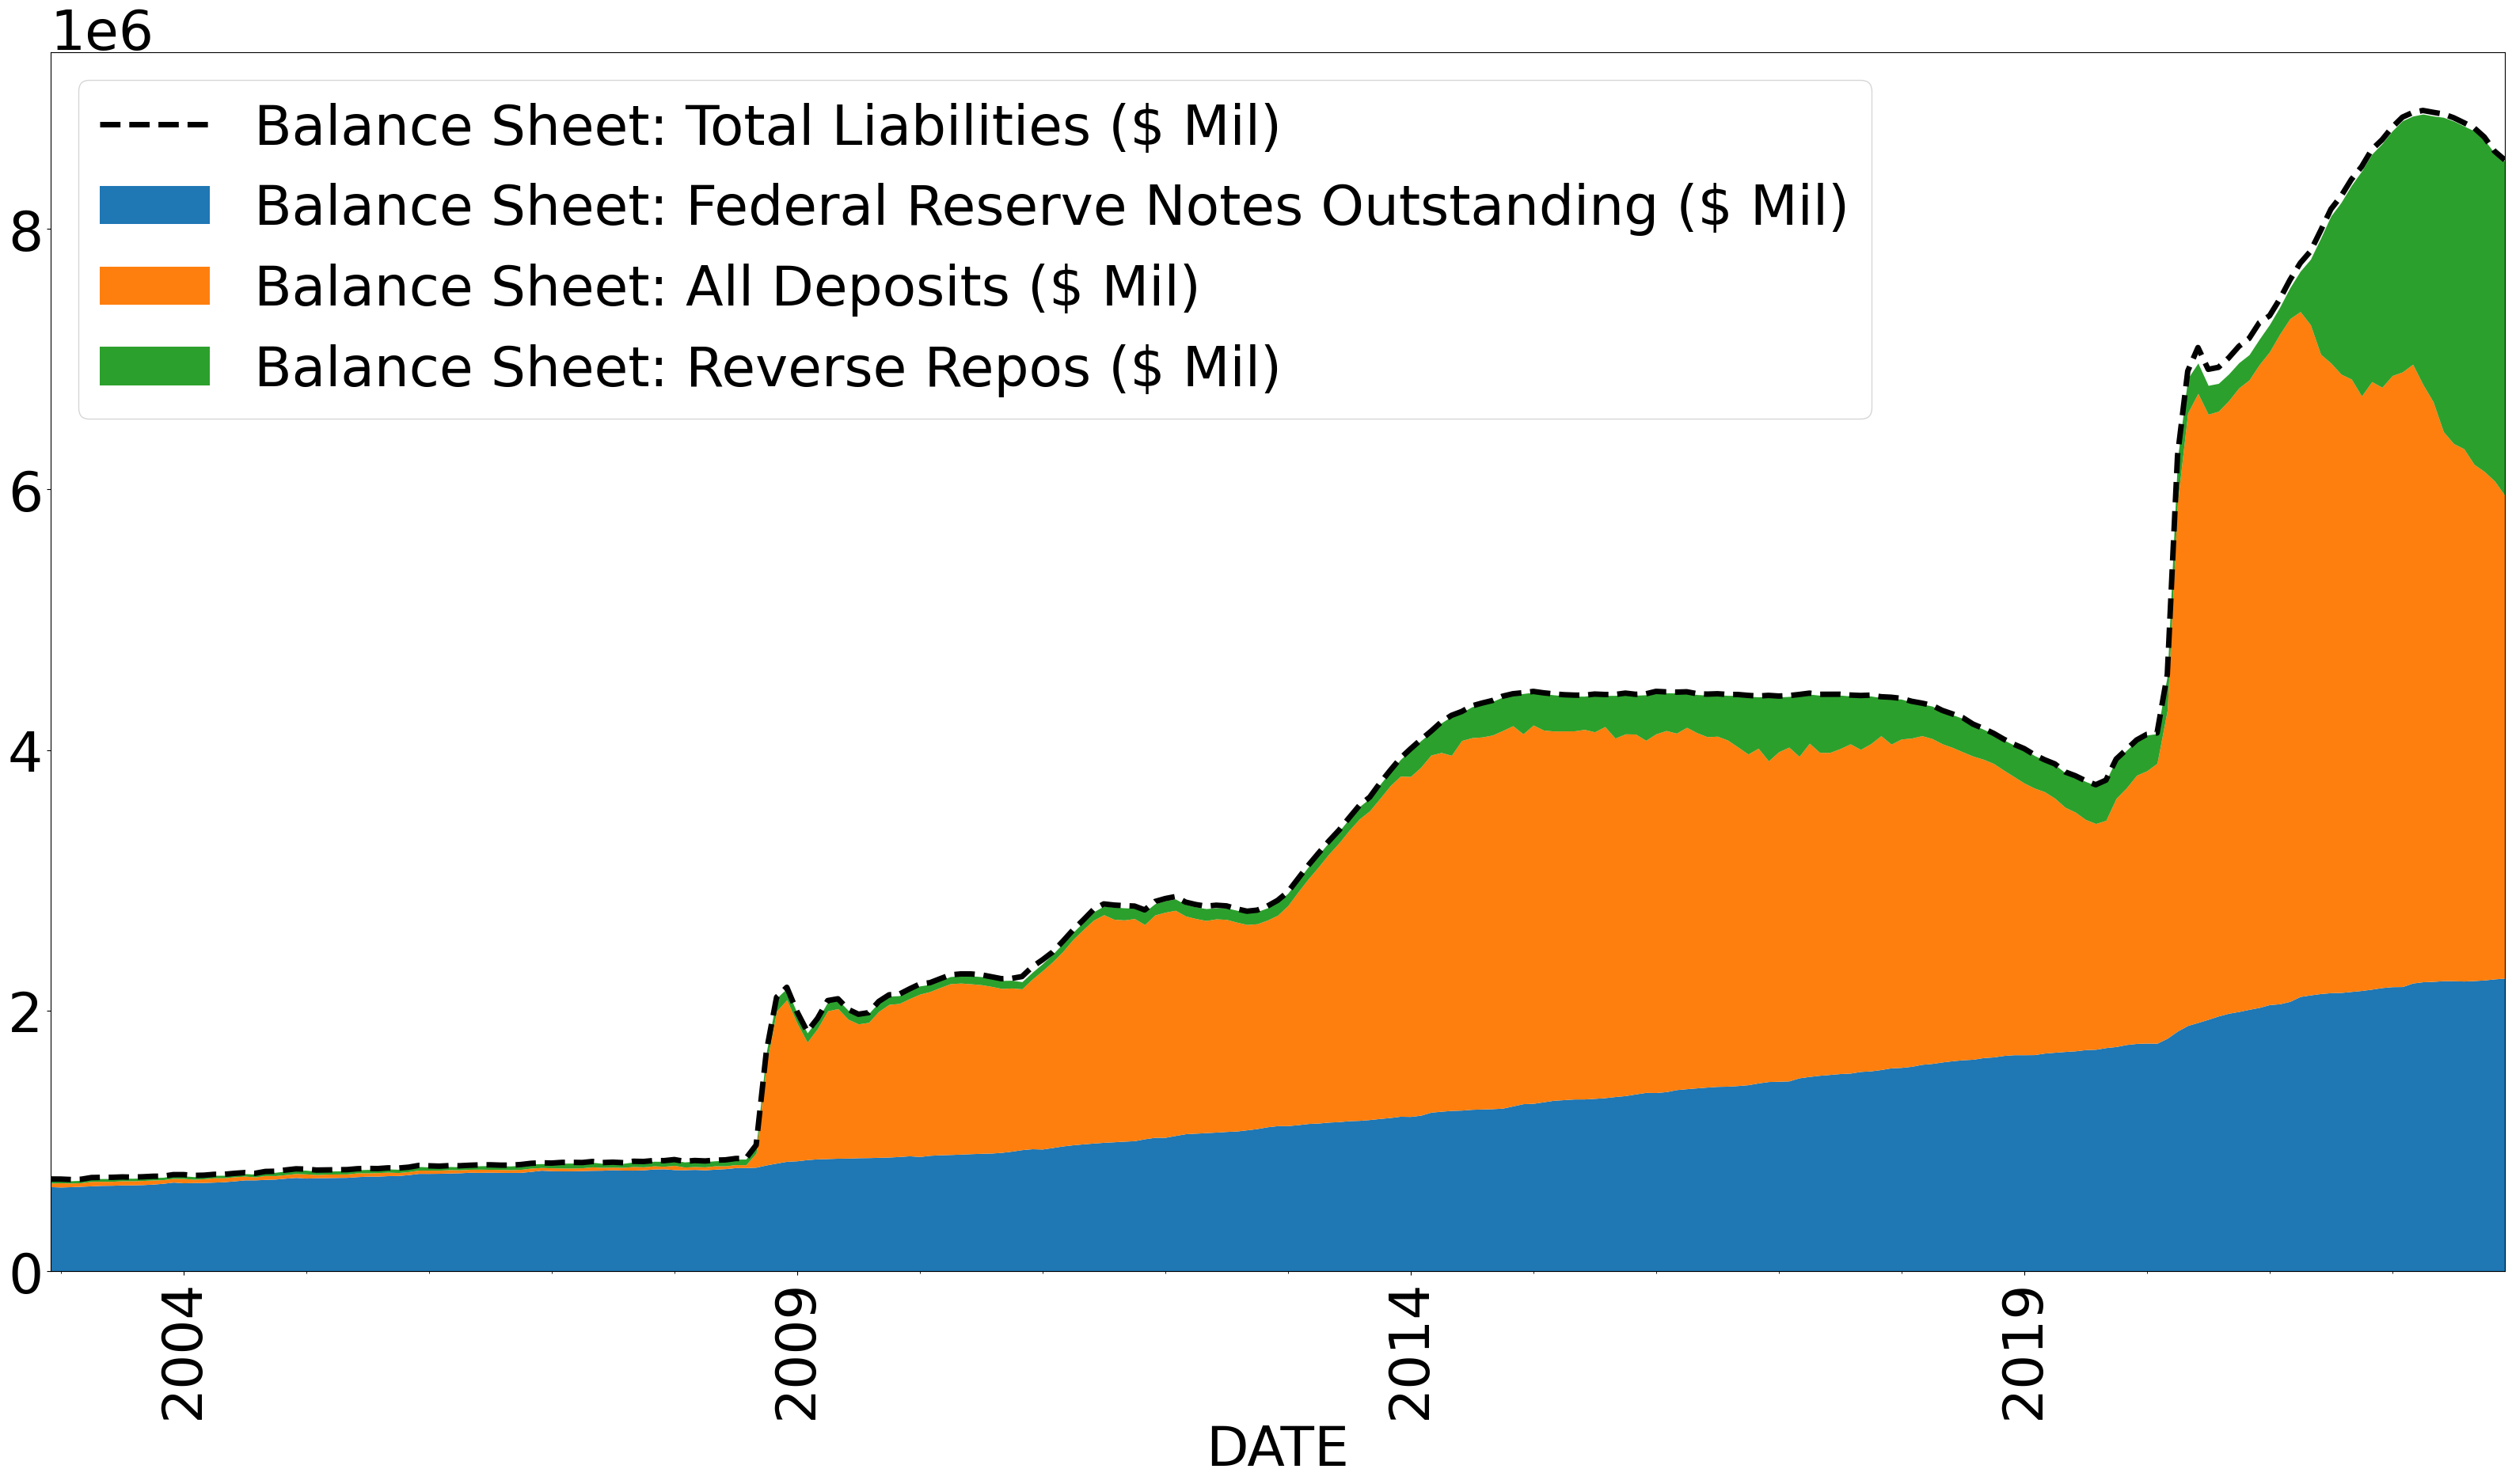

In [102]:
account_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                # Approximately Circulating Currency
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                # Federal Reserve Borrowing
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)
plt.xticks(rotation = 90)

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_6856\546213954.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


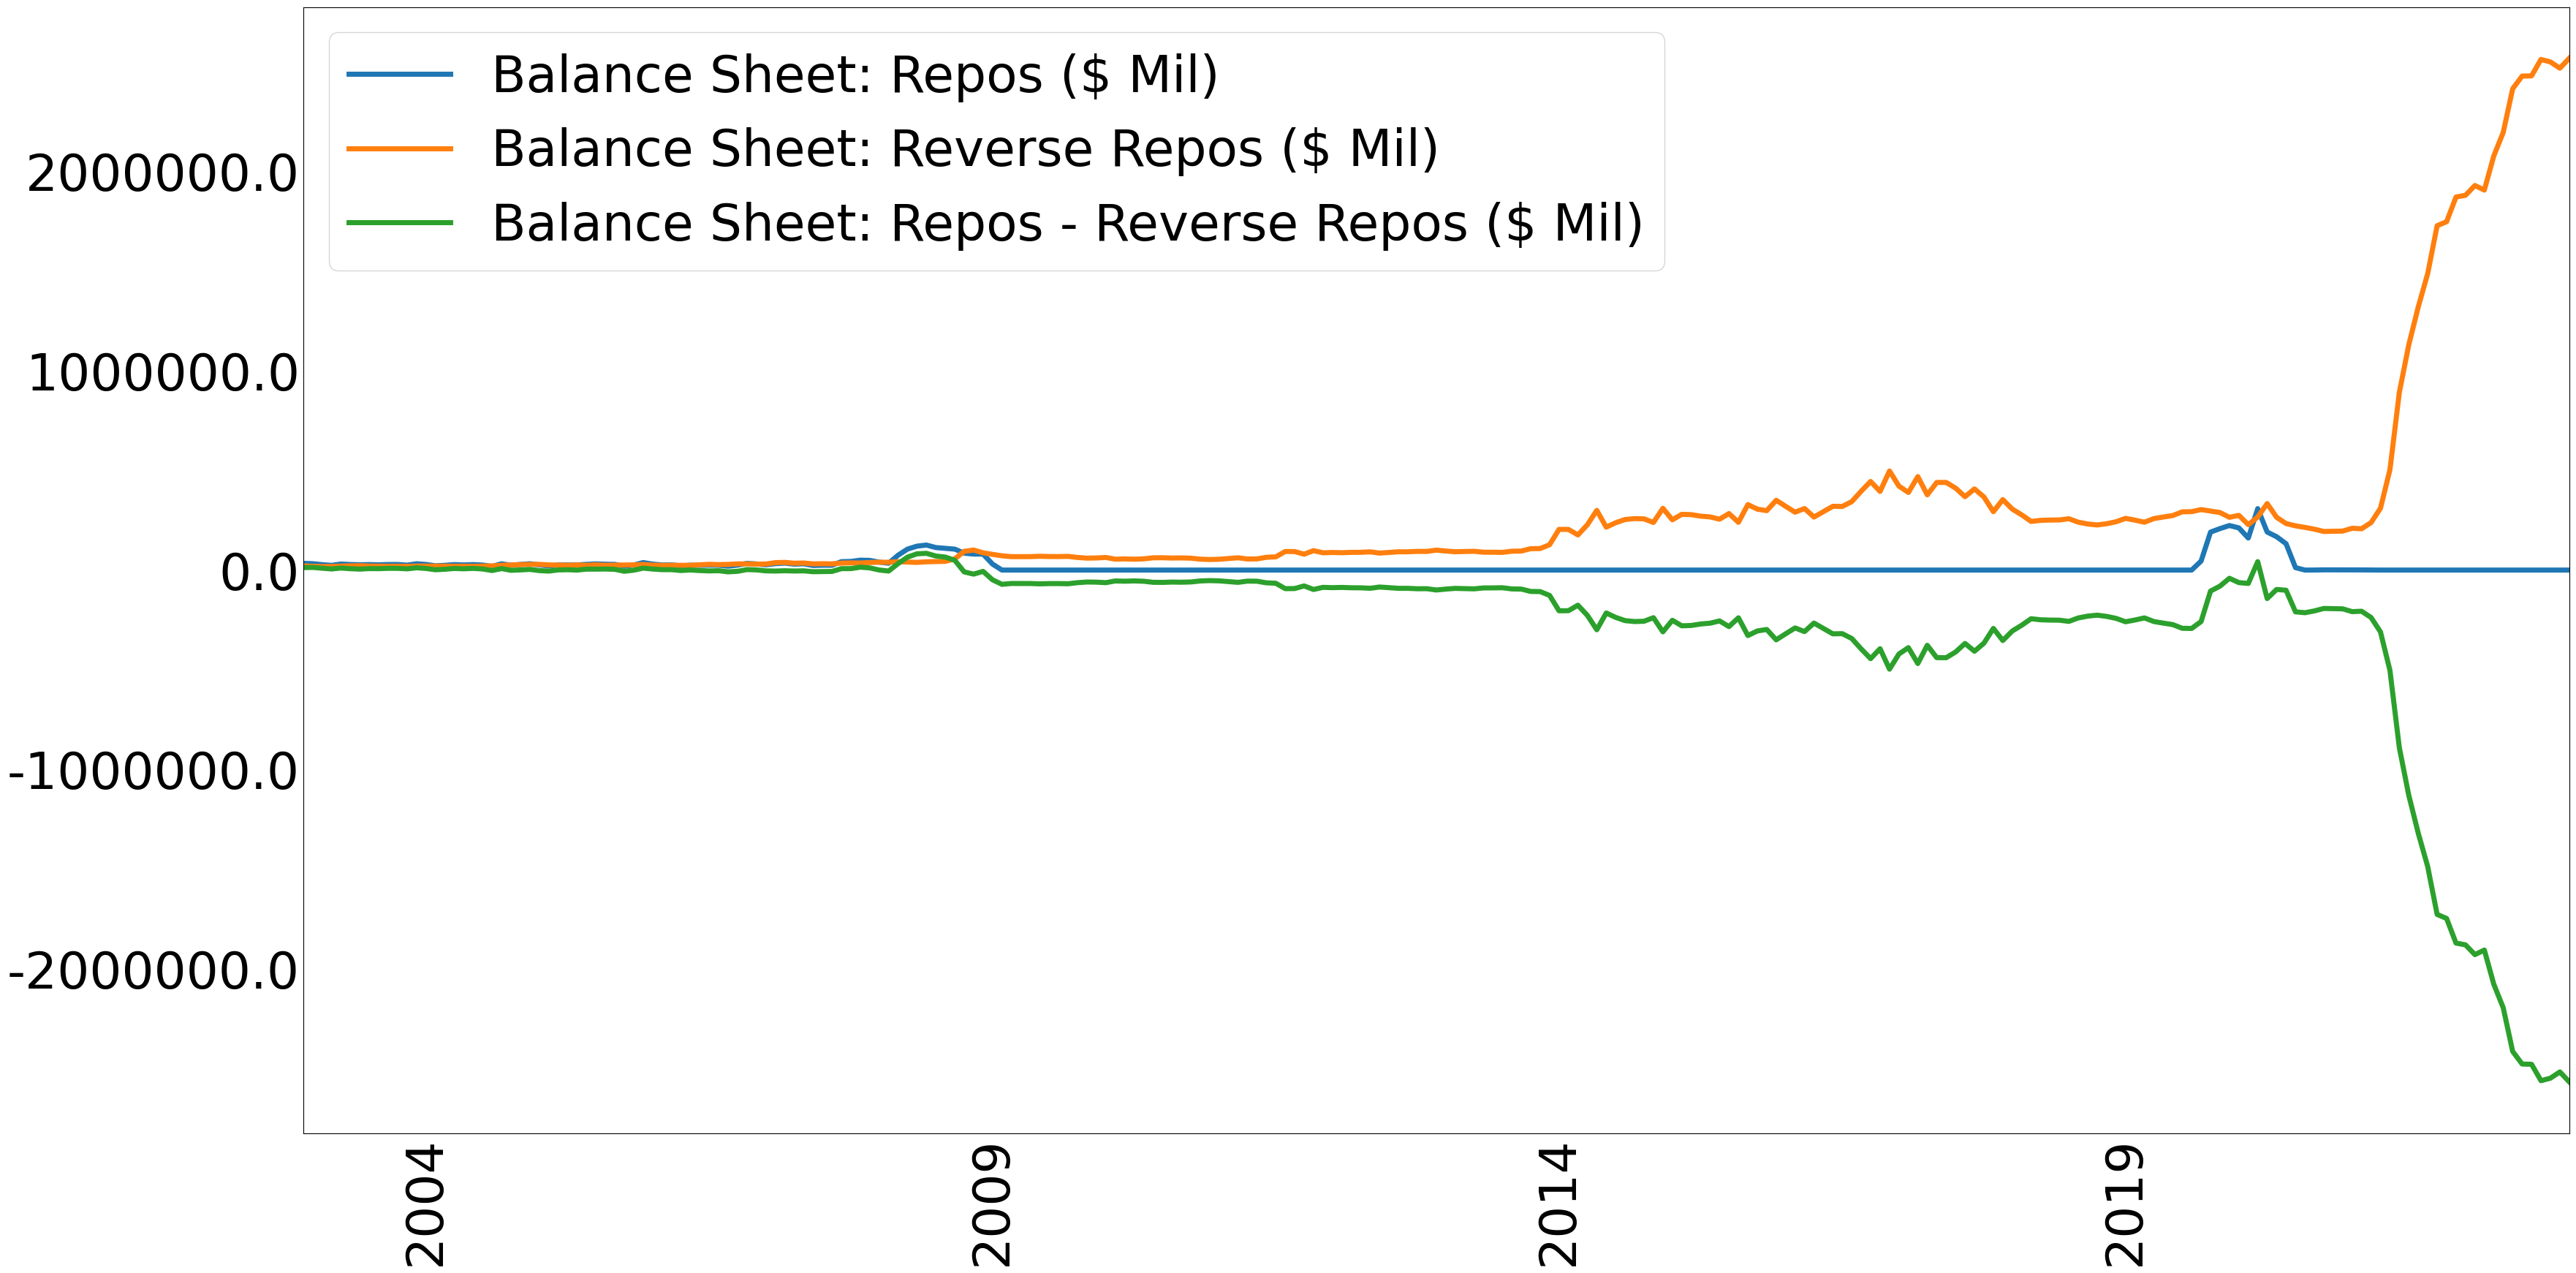

In [106]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_data = data[overnight_vars].dropna()
fig, ax = plot_lines(plot_data)